# **Project Name**    - Real Estate Investment Advisor: Predicting Property Profitability & Future Value



##### **Project Type**    - EDA/Regression/**Classification**/Unsupervised
**Real Estate / Investment / Financial Analytics**
##### **Contribution**    - Individual
##### **Team Member 1 - POOJA SANTHOSH**


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**



Develop a machine learning application to assist potential investors in making real estate decisions. The system should:

*   Classify whether a property is a
"Good Investment" (Classification).
*   Predict the estimated property price after 5 years (Regression).

Use the provided dataset to preprocess and analyze the data, engineer relevant features, and deploy a user-interactive application using Streamlit that provides investment recommendations and price forecasts. MLflow will be used for experiment tracking.



# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
! pip install mlflow
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import mlflow
import mlflow.sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from xgboost import XGBClassifier, XGBRegressor




[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


### Dataset Loading

In [2]:
# connect to drive
# from google.colab import drive
# drive.mount('/content/drive')
# Load Dataset
df = pd.read_csv("D:/labmetrix/India_household_price/india_housing_prices.csv")


### Dataset First View

In [3]:
# Dataset First Look
df.head()

,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,...,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
0,1,Tamil Nadu,Chennai,Locality_84,Apartment,1,4740,489.76,0.10,1990,...,35,10,3,High,No,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move
1,2,Maharashtra,Pune,Locality_490,Independent House,3,2364,195.52,0.08,2008,...,17,8,1,Low,No,Yes,"Playground, Clubhouse, Pool, Gym, Garden",North,Builder,Under_Construction
2,3,Punjab,Ludhiana,Locality_167,Apartment,2,3642,183.79,0.05,1997,...,28,9,8,Low,Yes,No,"Clubhouse, Pool, Playground, Gym",South,Broker,Ready_to_Move
3,4,Rajasthan,Jodhpur,Locality_393,Independent House,2,2741,300.29,0.11,1991,...,34,5,7,High,Yes,Yes,"Playground, Clubhouse, Gym, Pool, Garden",North,Builder,Ready_to_Move
4,5,Rajasthan,Jaipur,Locality_466,Villa,4,4823,182.90,0.04,2002,...,23,4,9,Low,No,Yes,"Playground, Garden, Gym, Pool, Clubhouse",East,Builder,Ready_to_Move


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
DF_rows = print(df.shape[0])
DF_columns = print(df.shape[1])

250000
23


### Dataset Information

In [5]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              250000 non-null  int64  
 1   State                           250000 non-null  object 
 2   City                            250000 non-null  object 
 3   Locality                        250000 non-null  object 
 4   Property_Type                   250000 non-null  object 
 5   BHK                             250000 non-null  int64  
 6   Size_in_SqFt                    250000 non-null  int64  
 7   Price_in_Lakhs                  250000 non-null  float64
 8   Price_per_SqFt                  250000 non-null  float64
 9   Year_Built                      250000 non-null  int64  
 10  Furnished_Status                250000 non-null  object 
 11  Floor_No                        250000 non-null  int64  
 12  Total_Floors    

#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
df.isnull().sum()

ID                                0
State                             0
City                              0
Locality                          0
Property_Type                     0
BHK                               0
Size_in_SqFt                      0
Price_in_Lakhs                    0
Price_per_SqFt                    0
Year_Built                        0
Furnished_Status                  0
Floor_No                          0
Total_Floors                      0
Age_of_Property                   0
Nearby_Schools                    0
Nearby_Hospitals                  0
Public_Transport_Accessibility    0
Parking_Space                     0
Security                          0
Amenities                         0
Facing                            0
Owner_Type                        0
Availability_Status               0
dtype: int64

<Axes: >

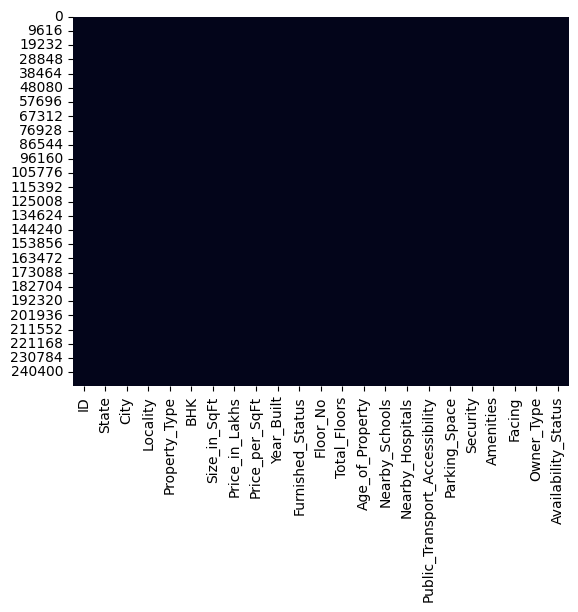

In [8]:
# Visualizing the missing values
sns.heatmap(df.isnull(), cbar=False)

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
df.columns


Index(['ID', 'State', 'City', 'Locality', 'Property_Type', 'BHK',
       'Size_in_SqFt', 'Price_in_Lakhs', 'Price_per_SqFt', 'Year_Built',
       'Furnished_Status', 'Floor_No', 'Total_Floors', 'Age_of_Property',
       'Nearby_Schools', 'Nearby_Hospitals', 'Public_Transport_Accessibility',
       'Parking_Space', 'Security', 'Amenities', 'Facing', 'Owner_Type',
       'Availability_Status'],
      dtype='object')

In [10]:
# Dataset Describe
df.describe()

,ID,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,Floor_No,Total_Floors,Age_of_Property,Nearby_Schools,Nearby_Hospitals
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,125000.500000,2.999396,2749.813216,254.586854,0.130597,2006.520012,14.966800,15.503004,18.479988,5.499860,5.498016
std,72168.927986,1.415521,1300.606954,141.349921,0.130747,9.808575,8.948047,8.671618,9.808575,2.878639,2.871860
min,1.000000,1.000000,500.000000,10.000000,0.000000,1990.000000,0.000000,1.000000,2.000000,1.000000,1.000000
25%,62500.750000,2.000000,1623.000000,132.550000,0.050000,1998.000000,7.000000,8.000000,10.000000,3.000000,3.000000
50%,125000.500000,3.000000,2747.000000,253.870000,0.090000,2007.000000,15.000000,15.000000,18.000000,5.000000,5.000000
75%,187500.250000,4.000000,3874.000000,376.880000,0.160000,2015.000000,23.000000,23.000000,27.000000,8.000000,8.000000
max,250000.000000,5.000000,5000.000000,500.000000,0.990000,2023.000000,30.000000,30.000000,35.000000,10.000000,10.000000


### Variables Description

Answer Here

### Check Unique Values for each variable.

In [11]:
for column in df.columns:
    print(f"Column '{column}': {df[column].nunique()} unique values")

Column 'ID': 250000 unique values
Column 'State': 20 unique values
Column 'City': 42 unique values
Column 'Locality': 500 unique values
Column 'Property_Type': 3 unique values
Column 'BHK': 5 unique values
Column 'Size_in_SqFt': 4501 unique values
Column 'Price_in_Lakhs': 48700 unique values
Column 'Price_per_SqFt': 100 unique values
Column 'Year_Built': 34 unique values
Column 'Furnished_Status': 3 unique values
Column 'Floor_No': 31 unique values
Column 'Total_Floors': 30 unique values
Column 'Age_of_Property': 34 unique values
Column 'Nearby_Schools': 10 unique values
Column 'Nearby_Hospitals': 10 unique values
Column 'Public_Transport_Accessibility': 3 unique values
Column 'Parking_Space': 2 unique values
Column 'Security': 2 unique values
Column 'Amenities': 325 unique values
Column 'Facing': 4 unique values
Column 'Owner_Type': 3 unique values
Column 'Availability_Status': 2 unique values


In [12]:
for column in df.columns:
    if df[column].nunique() == 3:
        print(f"'{column}' has 3 unique values: {df[column].unique()}")

'Property_Type' has 3 unique values: ['Apartment' 'Independent House' 'Villa']
'Furnished_Status' has 3 unique values: ['Furnished' 'Unfurnished' 'Semi-furnished']
'Public_Transport_Accessibility' has 3 unique values: ['High' 'Low' 'Medium']
'Owner_Type' has 3 unique values: ['Owner' 'Builder' 'Broker']


In [13]:
for column in df.columns:
    if df[column].nunique() == 2:
        print(f"'{column}' has 2 unique values: {df[column].unique()}")

'Parking_Space' has 2 unique values: ['No' 'Yes']
'Security' has 2 unique values: ['No' 'Yes']
'Availability_Status' has 2 unique values: ['Ready_to_Move' 'Under_Construction']


In [14]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(include='object').columns.tolist()

print("Numerical Columns and their dtypes:")
for col in numerical_cols:
    print(f"  - {col}: {df[col].dtype}")

print("\nCategorical Columns and their dtypes:")
for col in categorical_cols:
    print(f"  - {col}: {df[col].dtype}")

Numerical Columns and their dtypes:
  - ID: int64
  - BHK: int64
  - Size_in_SqFt: int64
  - Price_in_Lakhs: float64
  - Price_per_SqFt: float64
  - Year_Built: int64
  - Floor_No: int64
  - Total_Floors: int64
  - Age_of_Property: int64
  - Nearby_Schools: int64
  - Nearby_Hospitals: int64

Categorical Columns and their dtypes:
  - State: object
  - City: object
  - Locality: object
  - Property_Type: object
  - Furnished_Status: object
  - Public_Transport_Accessibility: object
  - Parking_Space: object
  - Security: object
  - Amenities: object
  - Facing: object
  - Owner_Type: object
  - Availability_Status: object


## 3. ***Data Wrangling***

### Data Wrangling Code

In [15]:
# Write your code to make your dataset analysis ready.
# Drop the 'ID' column as it is just an identifier and not useful for modeling
#df = df.drop('ID', axis=1)

# Feature Engineering: Create 'Amenities_Count' from the 'Amenities' column
df['Amenities_Count'] = df['Amenities'].apply(lambda x: len(x.split(', ')))

accessibility_mapping = {'High': 3, 'Medium': 2, 'Low': 1}
df['Public_Transport_Accessibility'] = df['Public_Transport_Accessibility'].map(accessibility_mapping)

print("Data type of 'Public_Transport_Accessibility' after conversion:")
print(df['Public_Transport_Accessibility'].dtype)
print("\nUnique values of 'Public_Transport_Accessibility' after conversion:")
print(df['Public_Transport_Accessibility'].unique())

# Re-identify numerical and categorical columns after manipulations
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(include='object').columns.tolist()

print("Data Wrangling complete. Displaying first 5 rows with new feature:")
display(df.head())

print("\nUpdated Numerical Columns:", numerical_cols)
print("Updated Categorical Columns:", categorical_cols)

Data type of 'Public_Transport_Accessibility' after conversion:
int64

Unique values of 'Public_Transport_Accessibility' after conversion:
[3 1 2]
Data Wrangling complete. Displaying first 5 rows with new feature:


,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,...,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status,Amenities_Count
0,1,Tamil Nadu,Chennai,Locality_84,Apartment,1,4740,489.76,0.10,1990,...,10,3,3,No,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move,5
1,2,Maharashtra,Pune,Locality_490,Independent House,3,2364,195.52,0.08,2008,...,8,1,1,No,Yes,"Playground, Clubhouse, Pool, Gym, Garden",North,Builder,Under_Construction,5
2,3,Punjab,Ludhiana,Locality_167,Apartment,2,3642,183.79,0.05,1997,...,9,8,1,Yes,No,"Clubhouse, Pool, Playground, Gym",South,Broker,Ready_to_Move,4
3,4,Rajasthan,Jodhpur,Locality_393,Independent House,2,2741,300.29,0.11,1991,...,5,7,3,Yes,Yes,"Playground, Clubhouse, Gym, Pool, Garden",North,Builder,Ready_to_Move,5
4,5,Rajasthan,Jaipur,Locality_466,Villa,4,4823,182.90,0.04,2002,...,4,9,1,No,Yes,"Playground, Garden, Gym, Pool, Clubhouse",East,Builder,Ready_to_Move,5



Updated Numerical Columns: ['ID', 'BHK', 'Size_in_SqFt', 'Price_in_Lakhs', 'Price_per_SqFt', 'Year_Built', 'Floor_No', 'Total_Floors', 'Age_of_Property', 'Nearby_Schools', 'Nearby_Hospitals', 'Public_Transport_Accessibility', 'Amenities_Count']
Updated Categorical Columns: ['State', 'City', 'Locality', 'Property_Type', 'Furnished_Status', 'Parking_Space', 'Security', 'Amenities', 'Facing', 'Owner_Type', 'Availability_Status']


In [16]:
#Feature Engineering
#Price per Sq Ft
df['Price_per_SqFt'] = df['Price_in_Lakhs']*100000 / df['Size_in_SqFt']
#Age of Property
df['Age_of_Property'] = 2025 - df['Year_Built']
#Investment Score
# df['Investment_Score'] = (
#     (df['BHK'] >= 3).astype(int) +
#     (df['Amenities'] != "None").astype(int) +
#     (df['Public_Transport_Accessibility'] >= 3).astype(int)
# )
# # Rule-based threshold: Good if cheaper than median price per sqft
# median_pps = df['Price_per_SqFt'].median()
# df['Good_Investment'] = (df['Price_per_SqFt'] <= median_pps).astype(int)

# print("Feature engineering re-executed. Displaying first 5 rows with updated features:")
# display(df.head())


In [17]:
df.head()

,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,...,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status,Amenities_Count
0,1,Tamil Nadu,Chennai,Locality_84,Apartment,1,4740,489.76,10332.489451,1990,...,10,3,3,No,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move,5
1,2,Maharashtra,Pune,Locality_490,Independent House,3,2364,195.52,8270.727580,2008,...,8,1,1,No,Yes,"Playground, Clubhouse, Pool, Gym, Garden",North,Builder,Under_Construction,5
2,3,Punjab,Ludhiana,Locality_167,Apartment,2,3642,183.79,5046.403075,1997,...,9,8,1,Yes,No,"Clubhouse, Pool, Playground, Gym",South,Broker,Ready_to_Move,4
3,4,Rajasthan,Jodhpur,Locality_393,Independent House,2,2741,300.29,10955.490697,1991,...,5,7,3,Yes,Yes,"Playground, Clubhouse, Gym, Pool, Garden",North,Builder,Ready_to_Move,5
4,5,Rajasthan,Jaipur,Locality_466,Villa,4,4823,182.90,3792.245490,2002,...,4,9,1,No,Yes,"Playground, Garden, Gym, Pool, Clubhouse",East,Builder,Ready_to_Move,5


### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

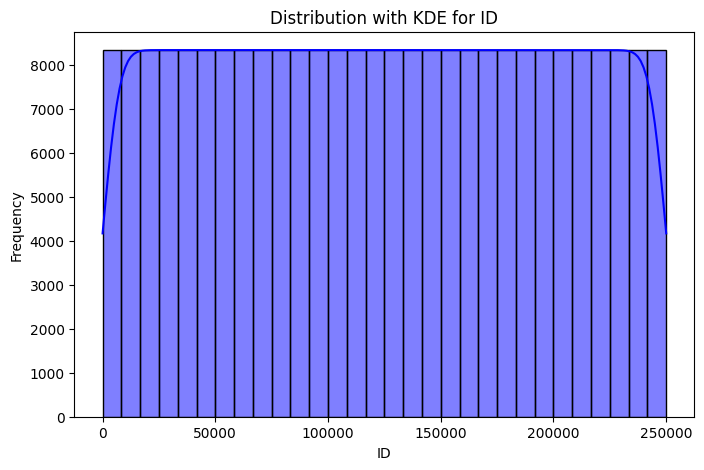

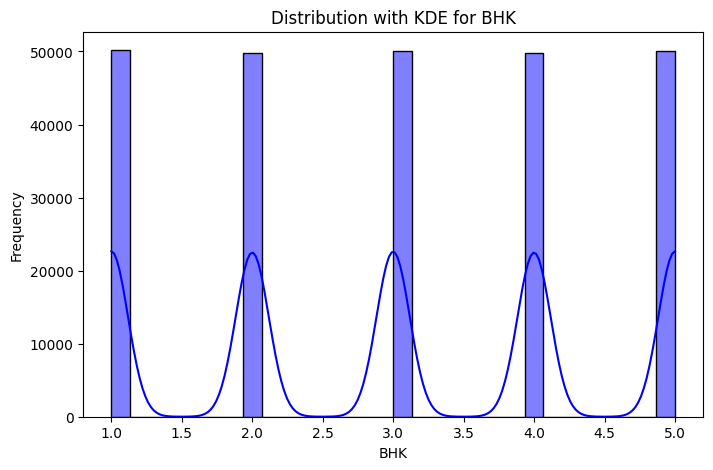

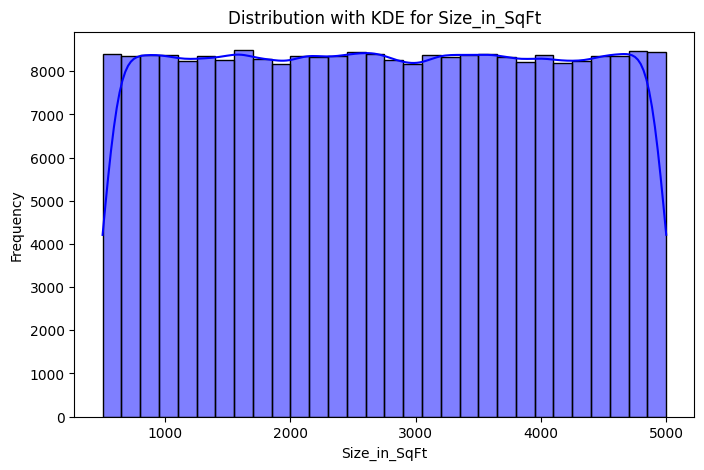

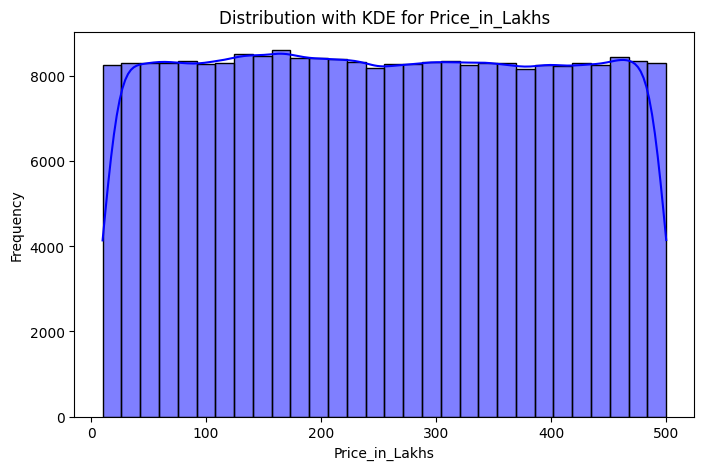

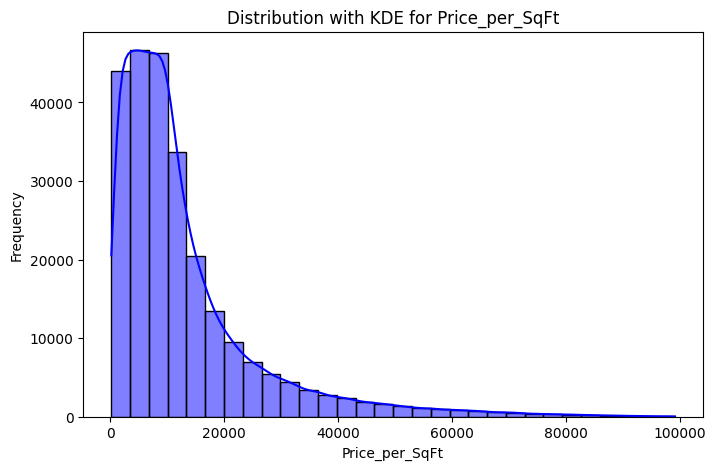

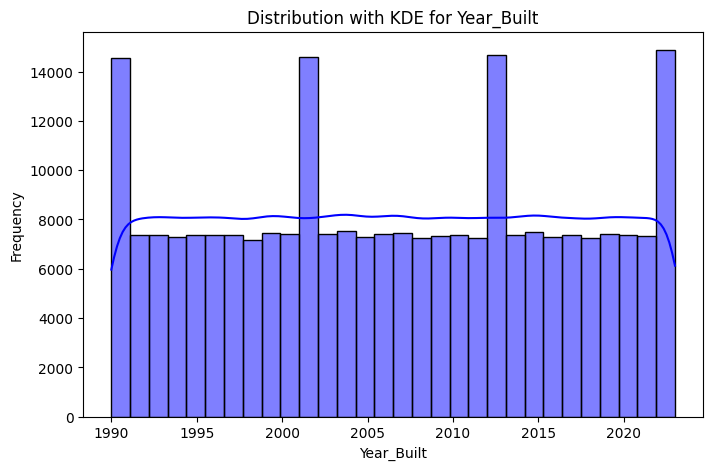

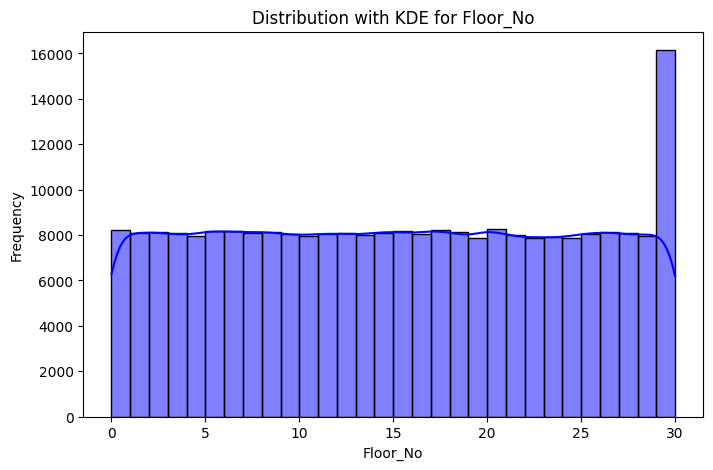

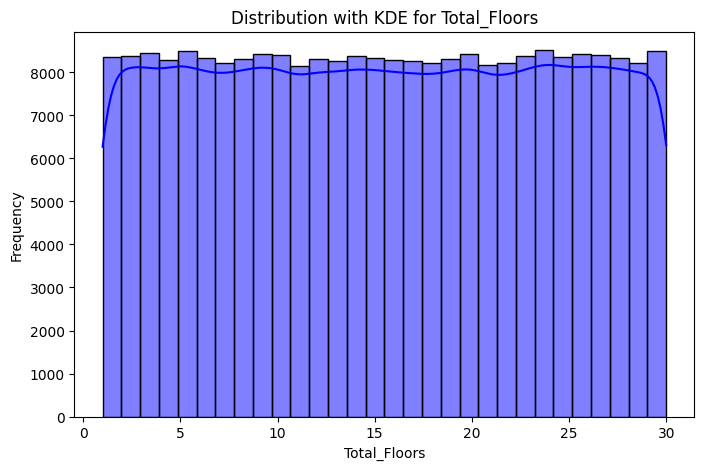

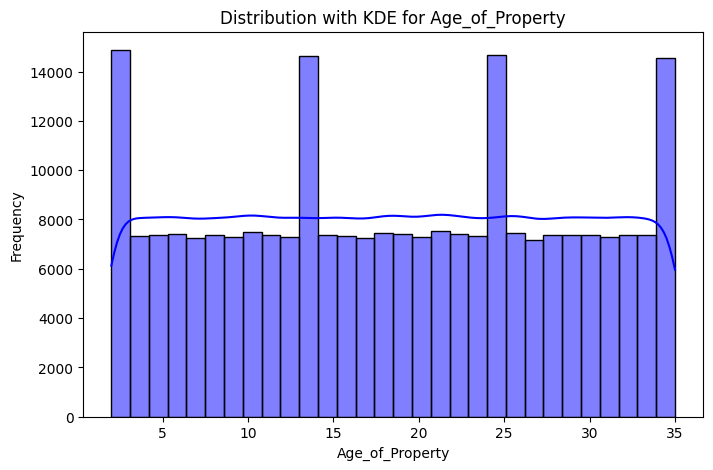

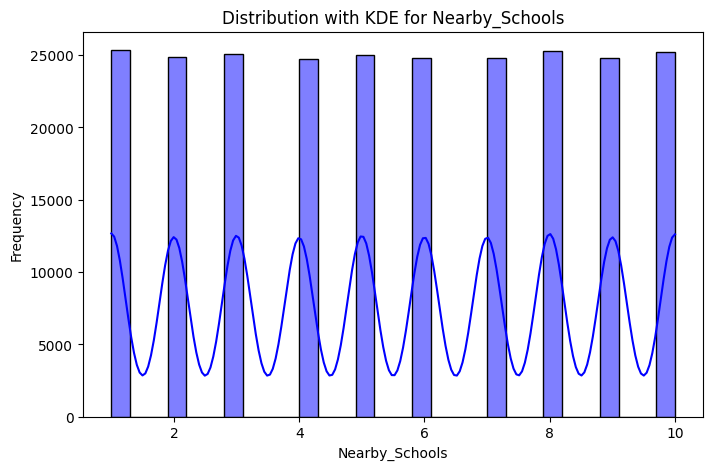

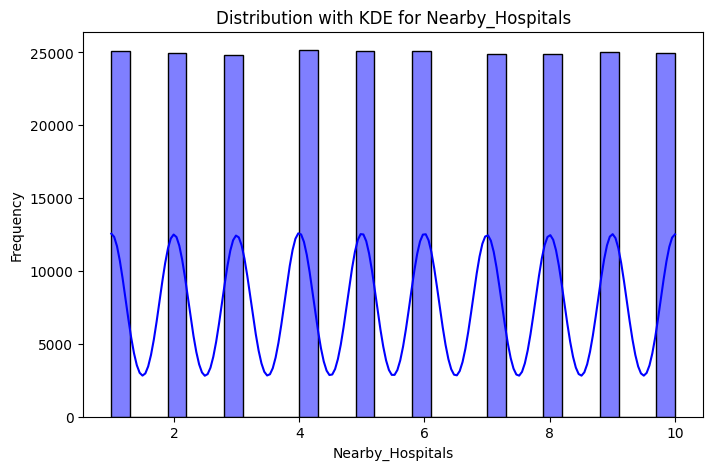

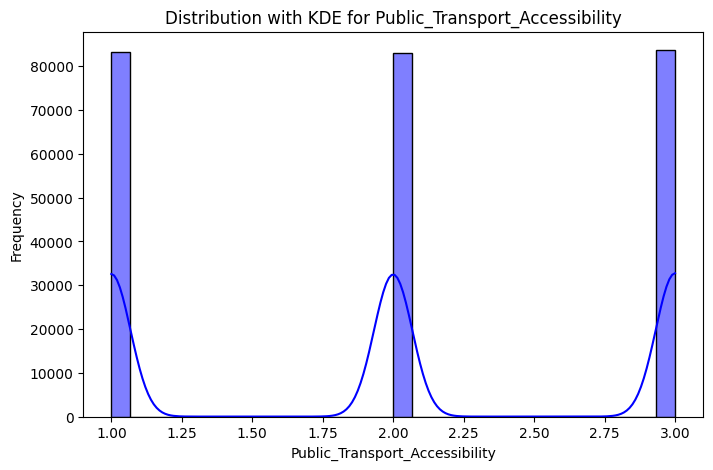

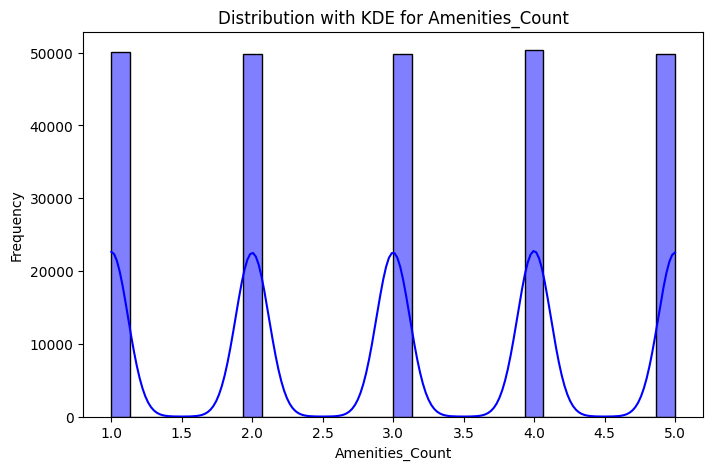

In [18]:
# Chart - 1 visualization code
numerical_col = [column for column in df.columns if df[column].dtype != 'object'] # seperated numerical columns

for col in numerical_col:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribution with KDE for {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

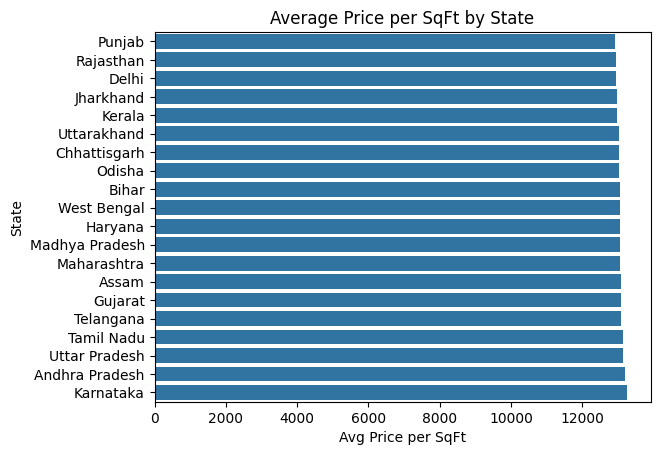

In [19]:
# Chart - 2 visualization code
# 6. Average Price per SqFt by State
# ================================
plt.figure()
state_price = df.groupby("State")["Price_per_SqFt"].mean().sort_values()
sns.barplot(x=state_price.values, y=state_price.index)
plt.title("Average Price per SqFt by State")
plt.xlabel("Avg Price per SqFt")
plt.ylabel("State")
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

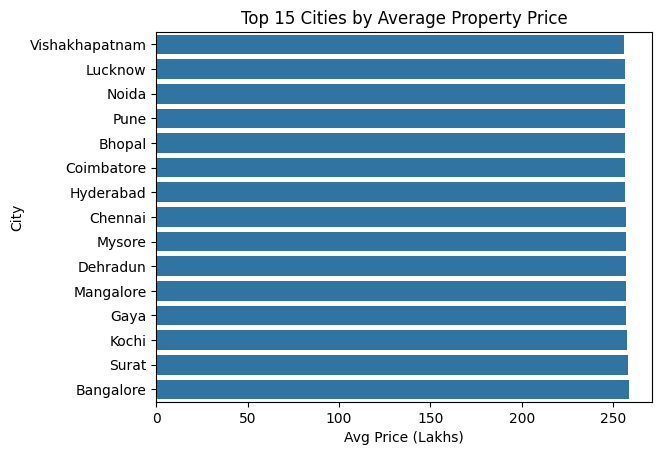

In [20]:
# Chart - 3 visualization code
# 7. Average Property Price by City
# ================================
plt.figure()
city_price = df.groupby("City")["Price_in_Lakhs"].mean().sort_values().tail(15)
sns.barplot(y=city_price.index, x=city_price.values)
plt.title("Top 15 Cities by Average Property Price")
plt.xlabel("Avg Price (Lakhs)")
plt.ylabel("City")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

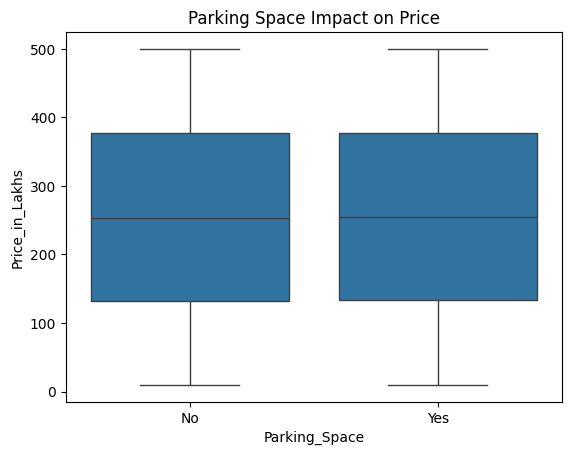

In [21]:
# Chart - 4 visualization code
# 14. Parking Space vs Price
# ================================
plt.figure()
sns.boxplot(x="Parking_Space", y="Price_in_Lakhs", data=df)
plt.title("Parking Space Impact on Price")
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

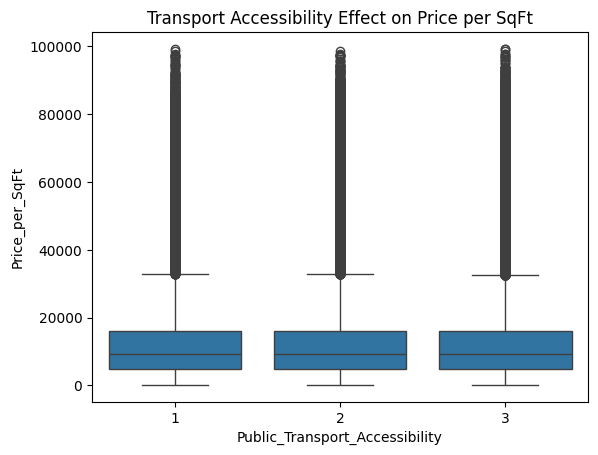

In [22]:
# Chart - 5 visualization code
# 16. Transport Accessibility vs Price per SqFt
# ================================
plt.figure()
sns.boxplot(x="Public_Transport_Accessibility", y="Price_per_SqFt", data=df)
plt.title("Transport Accessibility Effect on Price per SqFt")
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

#### Chart - 7

In [23]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [24]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Pre Processing


**Drop ID and Locality scinece it is irrelavent and locality doesnt make any meaningfull insight**

In [25]:

# Drop the 'ID' column as it is just an identifier and not useful for modeling
# Drop unnecessary columns safely
df = df.drop('ID', axis=1)
df = df.drop('Locality', axis=1)

print(df.head())
#Drop 'Locality' column since it's doesn't containg meaningful address
# df= df.drop('Locality', axis=1, inplace=True)

# print(df.head())

         State      City      Property_Type  BHK  Size_in_SqFt  \
0   Tamil Nadu   Chennai          Apartment    1          4740   
1  Maharashtra      Pune  Independent House    3          2364   
2       Punjab  Ludhiana          Apartment    2          3642   
3    Rajasthan   Jodhpur  Independent House    2          2741   
4    Rajasthan    Jaipur              Villa    4          4823   

   Price_in_Lakhs  Price_per_SqFt  Year_Built Furnished_Status  Floor_No  ...  \
0          489.76    10332.489451        1990        Furnished        22  ...   
1          195.52     8270.727580        2008      Unfurnished        21  ...   
2          183.79     5046.403075        1997   Semi-furnished        19  ...   
3          300.29    10955.490697        1991        Furnished        21  ...   
4          182.90     3792.245490        2002   Semi-furnished         3  ...   

   Nearby_Schools  Nearby_Hospitals  Public_Transport_Accessibility  \
0              10                 3          

#### **Encoding using Ordinal encoder and Onehot encoder**


In [26]:

from sklearn.preprocessing import OrdinalEncoder

ordinal_columns = ['Property_Type', 'Furnished_Status','Facing', 'Security','Owner_Type']
categories = [['Apartment', 'Independent House', 'Villa'],
              ['Unfurnished', 'Semi-furnished', 'Furnished'],
              ['South', 'East', 'West', 'North'], # In India, west facing and north facing properties are more valuable
              ['No', 'Yes'],
              ['Owner','Broker', 'Builder'] ]

encoder = OrdinalEncoder(categories=categories)
df[ordinal_columns] = encoder.fit_transform(df[ordinal_columns])

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 22 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   State                           250000 non-null  object 
 1   City                            250000 non-null  object 
 2   Property_Type                   250000 non-null  float64
 3   BHK                             250000 non-null  int64  
 4   Size_in_SqFt                    250000 non-null  int64  
 5   Price_in_Lakhs                  250000 non-null  float64
 6   Price_per_SqFt                  250000 non-null  float64
 7   Year_Built                      250000 non-null  int64  
 8   Furnished_Status                250000 non-null  float64
 9   Floor_No                        250000 non-null  int64  
 10  Total_Floors                    250000 non-null  int64  
 11  Age_of_Property                 250000 non-null  int64  
 12  Nearby_Schools  

#### Separating Categorical and Numerical columns

In [28]:
categorical_col = [column for column in df.columns if df[column].dtype == 'object']
numerical_col = [column for column in df.columns if df[column].dtype != 'object']

#### Chart - 12

In [29]:
print(len(categorical_col), len(numerical_col))


# Lower cap strings for better accessibility

for column in categorical_col:
    df[column] = df[column].str.lower()

5 17


#### Chart - 14 - Correlation Heatmap

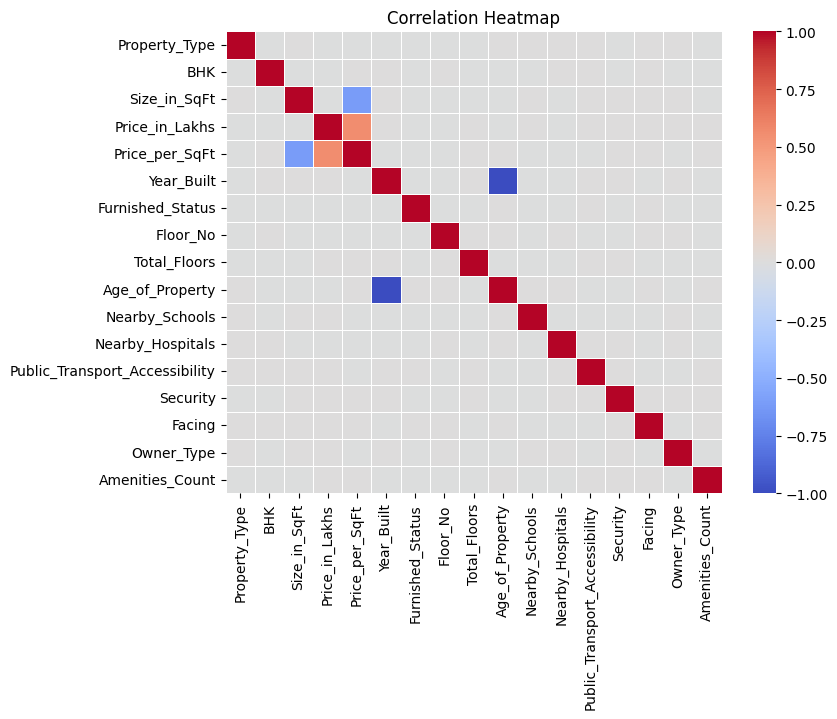

In [30]:
# Correlation Heatmap visualization code

correlation_matrix = df[numerical_col].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

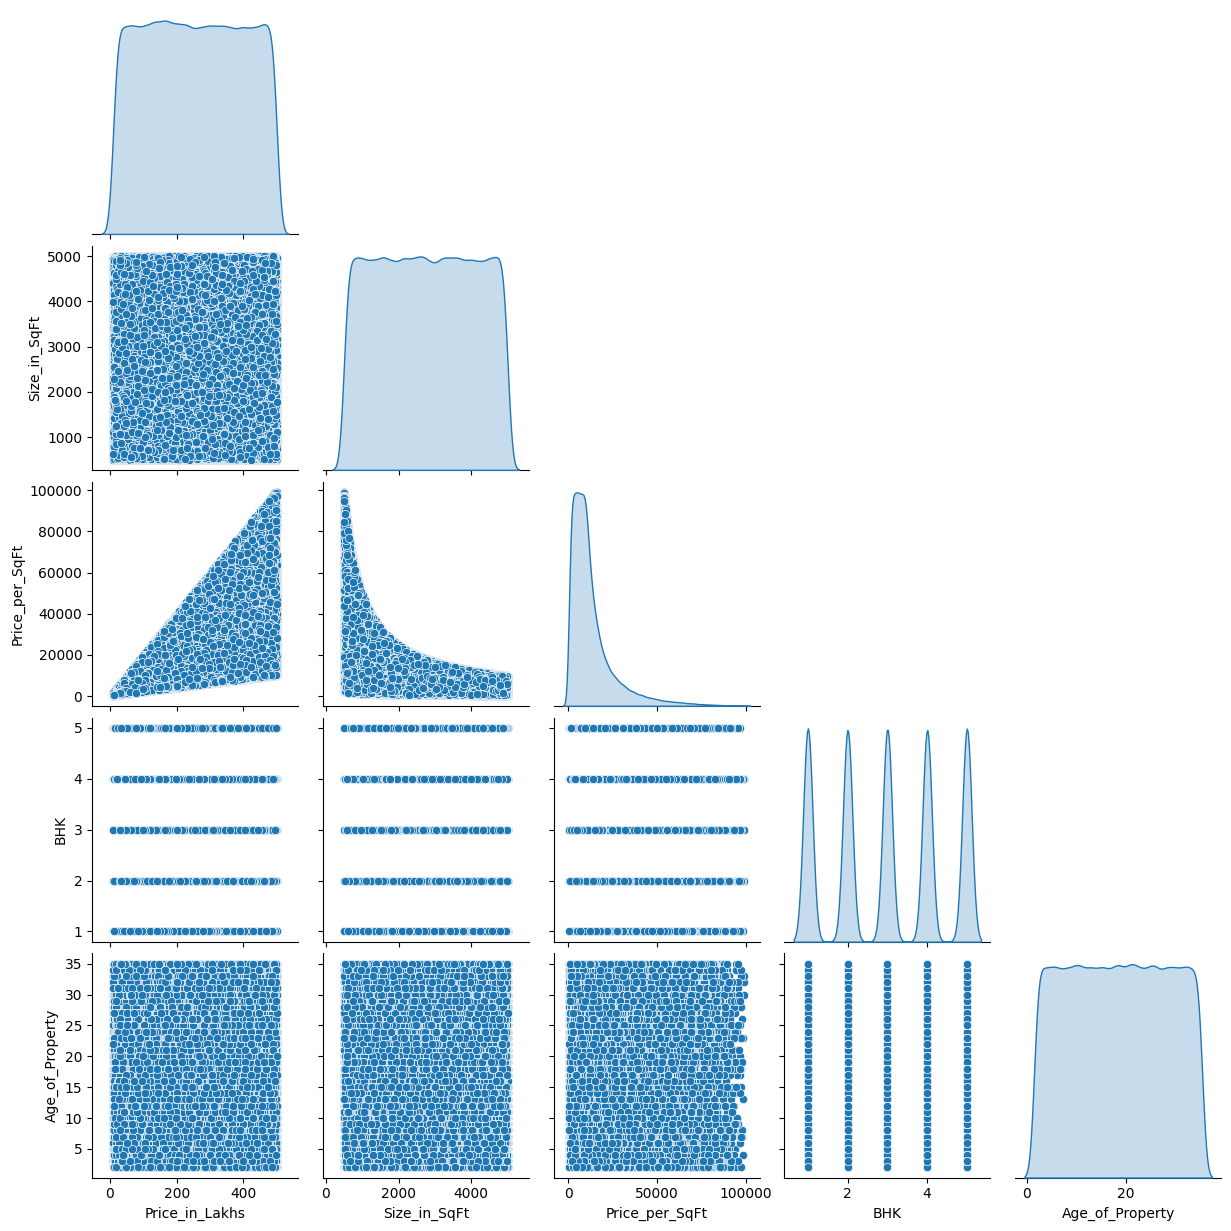

In [31]:
# Pair Plot visualization code
sns.pairplot(
    df[['Price_in_Lakhs', 'Size_in_SqFt', 'Price_per_SqFt', 'BHK', 'Age_of_Property']],
    diag_kind="kde",
    corner=True
)
plt.show()


In [32]:
#Splitting Dataset and Picking Out Smaller Sample 3;7 ration can be used for training and testing

# Randomly sample 30% of the data
sample_df = df.sample(frac=0.4, random_state=1)

In [33]:
sample_df

,State,City,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,Furnished_Status,Floor_No,...,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status,Amenities_Count
240208,karnataka,bangalore,0.0,5,3342,108.05,3233.093956,2013,2.0,14,...,4,1,2,no,0.0,"playground, pool, clubhouse, gym",3.0,0.0,ready_to_move,4
18744,chhattisgarh,bilaspur,2.0,2,4417,25.74,582.748472,2001,2.0,5,...,7,5,2,yes,1.0,"gym, pool, garden",0.0,2.0,ready_to_move,3
207175,chhattisgarh,raipur,0.0,4,1850,41.04,2218.378378,2014,2.0,27,...,2,9,3,yes,1.0,garden,0.0,0.0,under_construction,1
18669,uttarakhand,haridwar,0.0,1,3204,249.55,7788.701623,2014,0.0,18,...,3,7,1,no,1.0,"playground, clubhouse, pool, garden",0.0,0.0,ready_to_move,4
189086,tamil nadu,coimbatore,0.0,1,4646,54.48,1172.621610,2008,1.0,18,...,4,8,2,yes,0.0,"playground, garden, clubhouse, pool, gym",2.0,2.0,under_construction,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217635,assam,guwahati,2.0,5,3030,305.73,10090.099010,2018,2.0,7,...,9,9,2,no,0.0,playground,2.0,1.0,under_construction,1
154802,punjab,ludhiana,2.0,4,4784,483.02,10096.571906,2007,2.0,16,...,9,4,2,no,0.0,"playground, garden",2.0,1.0,ready_to_move,2
246477,uttar pradesh,noida,0.0,1,2254,436.77,19377.551020,2006,1.0,30,...,10,9,2,yes,1.0,"garden, gym, clubhouse, playground",0.0,2.0,ready_to_move,4
41107,jharkhand,ranchi,0.0,5,3136,296.59,9457.589286,1994,0.0,24,...,3,5,3,no,1.0,garden,0.0,0.0,under_construction,1


In [34]:
sample_df.columns

Index(['State', 'City', 'Property_Type', 'BHK', 'Size_in_SqFt',
       'Price_in_Lakhs', 'Price_per_SqFt', 'Year_Built', 'Furnished_Status',
       'Floor_No', 'Total_Floors', 'Age_of_Property', 'Nearby_Schools',
       'Nearby_Hospitals', 'Public_Transport_Accessibility', 'Parking_Space',
       'Security', 'Amenities', 'Facing', 'Owner_Type', 'Availability_Status',
       'Amenities_Count'],
      dtype='object')

In [35]:
X = sample_df.drop('Price_in_Lakhs', axis=1)
y = sample_df['Price_in_Lakhs']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [36]:

len(X_test), len(X_train)

(30000, 70000)

In [37]:
categorical_col

['State', 'City', 'Parking_Space', 'Amenities', 'Availability_Status']

**Encoding Categorical Variables**

DictVectorizer automatically handles categorical columns

In [38]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False)
train_dicts = X_train.to_dict(orient='records') # using resampled data as our train feature
test_dicts = X_test.to_dict(orient='records')

In [39]:

X_train = dv.fit_transform(train_dicts)
X_test = dv.transform(test_dicts)

In [40]:
import pickle

with open("dict_vectorizer.pkl", "wb") as f:
    pickle.dump(dv, f)

print("Vectorizer saved!")



Vectorizer saved!


## ***5. Model Training***

Training Using Different Models and Evaluating Their Results

Helper function and list to evaluate models and store scores

In [41]:
model_results = []

def evaluate_model(y, y_pred):
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, y_pred)

    return mae, mse, rmse, r2

### linear Regression

In [42]:
model = LinearRegression(n_jobs=-1)
model.fit(X_train, y_train)


LinearRegression(n_jobs=-1)

In [43]:
y_pred = model.predict(X_test)
mae, mse, rmse, r2 = evaluate_model(y_test, y_pred)
mae, mse, rmse, r2

(81.33538366768391,
 10235.155193920504,
 101.16894382131557,
 0.49353490757948837)

In [44]:
y_pred

array([168.96420288, 286.03018951, 296.03087616, ..., 124.57439423,
       253.06476593, 200.6969986 ])

In [45]:
# Store results
model_results.append({
    "Model": "Linear Regression",
    "MAE": mae,
    "MSE": mse,
    "RMSE": rmse,
    "R² Score": r2
})

# Convert list of dictionaries into a table (DataFrame)
results_df = pd.DataFrame(model_results)

# Display table
results_df

,Model,MAE,MSE,RMSE,R² Score
0,Linear Regression,81.335384,10235.155194,101.168944,0.493535


#### Random Forest

In [46]:

rf = RandomForestRegressor(random_state=1, n_jobs=-1, max_features='sqrt')
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
mae, mse, rmse, r2 = evaluate_model(y_test, y_pred)
mae, mse, rmse, r2


(41.89953372, 2796.689067671556, 52.883731597454016, 0.8616117332572504)

In [47]:
scores = []

for trees in [50, 100, 150, 200, 300, 400, 500]:
  rf = RandomForestRegressor(n_estimators=trees, random_state=1, n_jobs=-1, max_features='sqrt')
  rf.fit(X_train, y_train)
  y_pred = rf.predict(X_test)
  mae, mse, rmse, r2 = evaluate_model(y_test, y_pred)

  # Store results
  scores.append({
        "Trees": trees,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R²": r2
    })

# Convert to DataFrame for easy viewing
rf_tuning_results = pd.DataFrame(scores)
rf_tuning_results

,Trees,MAE,MSE,RMSE,R²
0,50,40.644255,2680.307140,51.771683,0.867371
1,100,41.899534,2796.689068,52.883732,0.861612
2,150,42.239179,2828.087518,53.179766,0.860058
3,200,42.488193,2848.964443,53.375692,0.859025
4,300,42.307397,2816.596257,53.071614,0.860627
5,400,42.390823,2829.742408,53.195323,0.859976
6,500,42.524770,2845.287465,53.341236,0.859207


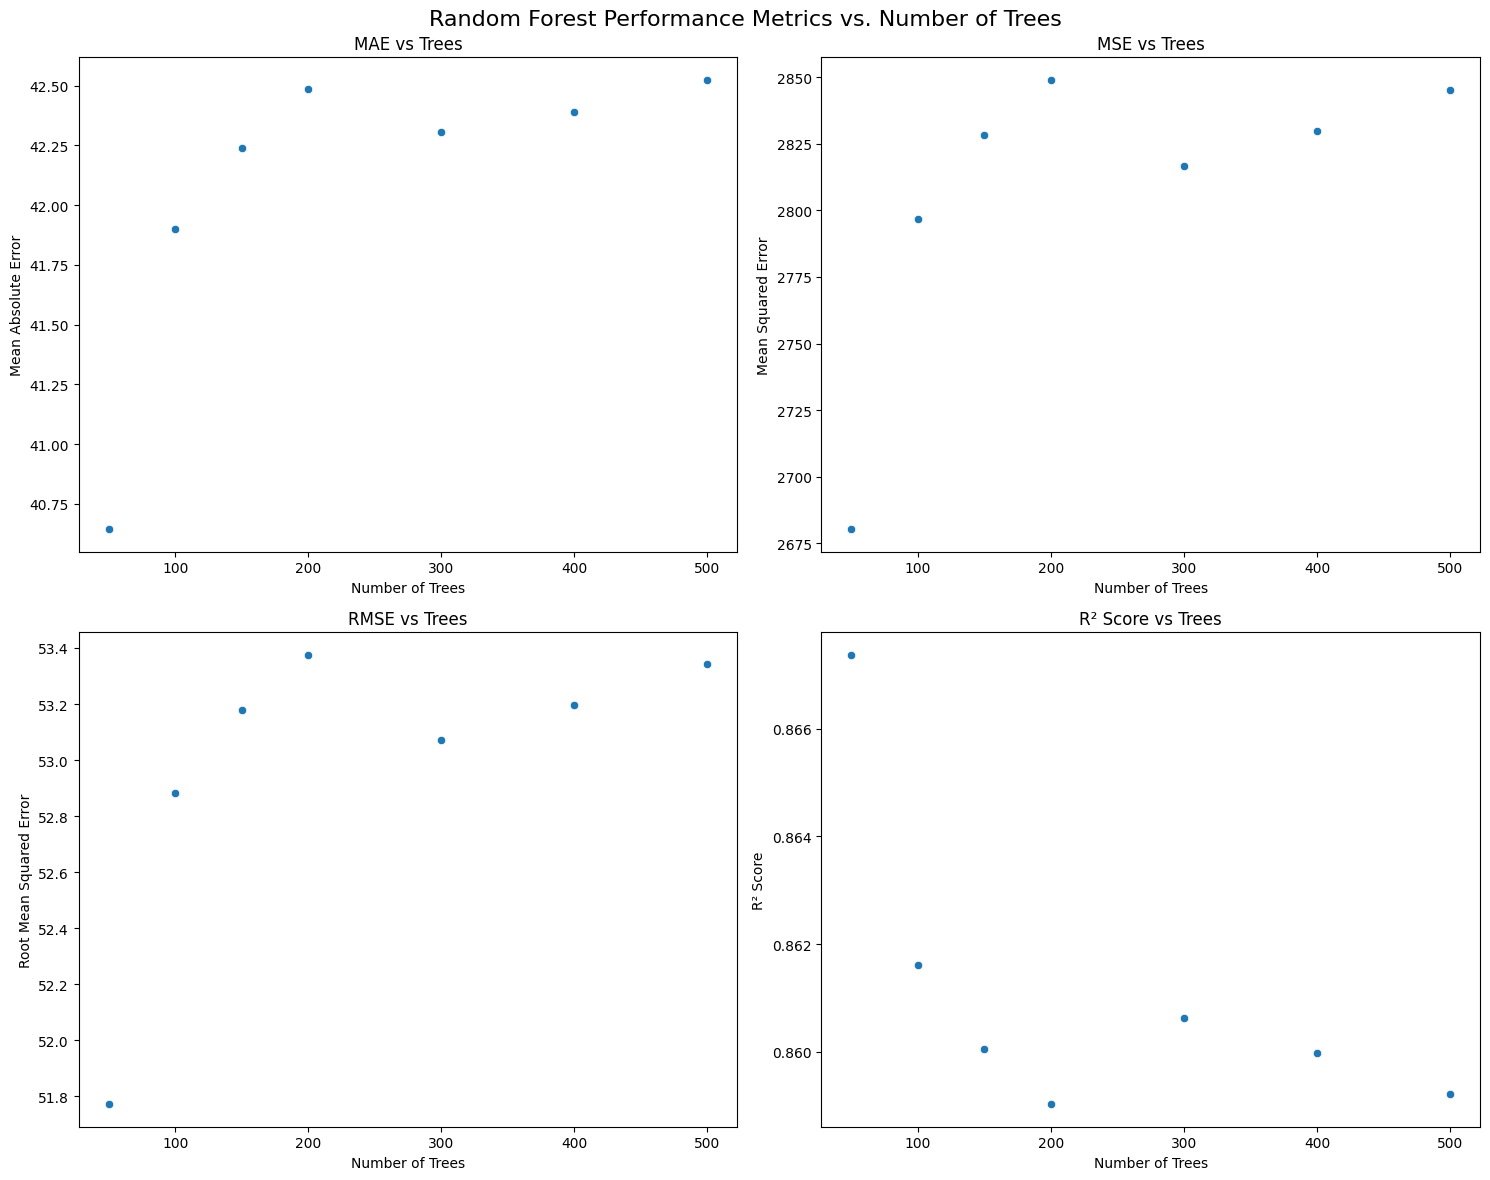

In [48]:
df_scores = pd.DataFrame(scores)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Random Forest Performance Metrics vs. Number of Trees', fontsize=16)

# MAE
sns.scatterplot(data=df_scores, x='Trees', y='MAE', ax=axes[0,0], marker='o')
axes[0,0].set_title('MAE vs Trees')
axes[0,0].set_xlabel('Number of Trees')
axes[0,0].set_ylabel('Mean Absolute Error')

# MSE
sns.scatterplot(data=df_scores, x='Trees', y='MSE', ax=axes[0,1], marker='o')
axes[0,1].set_title('MSE vs Trees')
axes[0,1].set_xlabel('Number of Trees')
axes[0,1].set_ylabel('Mean Squared Error')

# RMSE
sns.scatterplot(data=df_scores, x='Trees', y='RMSE', ax=axes[1,0], marker='o')
axes[1,0].set_title('RMSE vs Trees')
axes[1,0].set_xlabel('Number of Trees')
axes[1,0].set_ylabel('Root Mean Squared Error')

# R²
sns.scatterplot(data=df_scores, x='Trees', y='R²', ax=axes[1,1], marker='o')
axes[1,1].set_title('R² Score vs Trees')
axes[1,1].set_xlabel('Number of Trees')
axes[1,1].set_ylabel('R² Score')

plt.tight_layout()
plt.show()


#### Depth Tuning

In [49]:
dfscores = []

for n in [1, 3, 5, 10, 20, 25, 35, 50]: # tuning depths
    rf = RandomForestRegressor(max_depth=n ,n_estimators=100, random_state=1, n_jobs=-1,
                               max_features='sqrt', verbose=1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    mae, mse, rmse, r2 = evaluate_model(y_test, y_pred)
    mae, mse, rmse, r2
    dfscores.append((n, mae, mse, rmse, r2))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0

In [50]:
df_scores = pd.DataFrame(dfscores, columns=['depth', 'mae', 'mse', 'rmse', 'r2'])

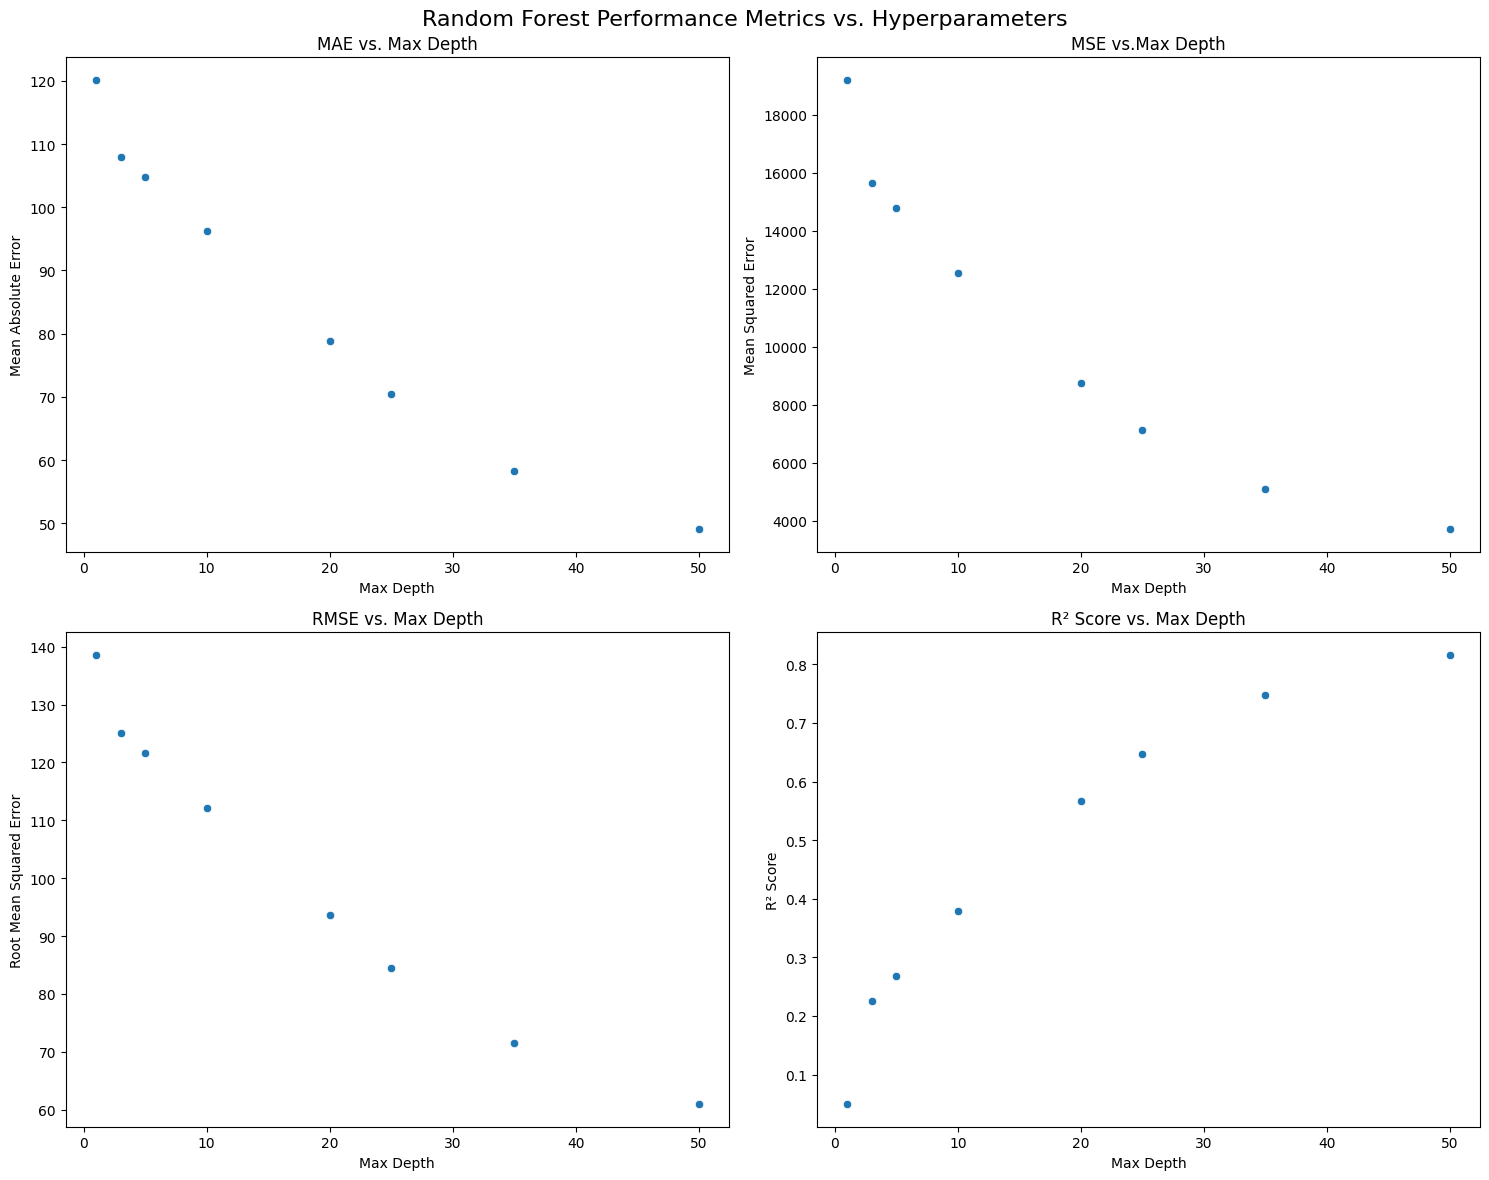

In [51]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Random Forest Performance Metrics vs. Hyperparameters', fontsize=16)

sns.scatterplot(data=df_scores, x='depth', y='mae', ax=axes[0,0], marker='o')
axes[0,0].set_title('MAE vs. Max Depth')
axes[0,0].set_xlabel('Max Depth')
axes[0,0].set_ylabel('Mean Absolute Error')

sns.scatterplot(data=df_scores, x='depth', y='mse', ax=axes[0,1], marker='o')
axes[0,1].set_title('MSE vs.Max Depth')
axes[0,1].set_xlabel('Max Depth')
axes[0,1].set_ylabel('Mean Squared Error')

sns.scatterplot(data=df_scores, x='depth', y='rmse', ax=axes[1,0], marker='o')
axes[1,0].set_title('RMSE vs. Max Depth')
axes[1,0].set_xlabel('Max Depth')
axes[1,0].set_ylabel('Root Mean Squared Error')

sns.scatterplot(data=df_scores, x='depth', y='r2', ax=axes[1,1], marker='o')
axes[1,1].set_title('R² Score vs. Max Depth')
axes[1,1].set_xlabel('Max Depth')
axes[1,1].set_ylabel('R² Score')

plt.tight_layout()
plt.show()

### Hyperparameter tunning:Min sample Leafs


In [52]:
rf_scores = []

# List of min_samples_leaf values to test
leaf_values = [1, 3, 5, 10, 20, 35]
for leaf in leaf_values: # Initialize the Random Forest model with fixed max_depth & n_estimators
    rf = RandomForestRegressor(
        n_estimators=100,
        max_depth=50,
        min_samples_leaf=leaf,
        random_state=1,
        n_jobs=-1,
        max_features='sqrt',
        verbose=0
    )

    rf.fit(X_train, y_train)

    # Prediction
    y_pred = rf.predict(X_test)
    mae, mse, rmse, r2 = evaluate_model(y_test, y_pred)

    # Store results
    rf_scores.append({
        "Min_Samples_Leaf": leaf,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R²": r2
    })

# Convert results to DataFrame
rf_leaf_results = pd.DataFrame(rf_scores)
rf_leaf_results


,Min_Samples_Leaf,MAE,MSE,RMSE,R²
0,1,49.056022,3711.253593,60.920059,0.816356
1,3,53.931564,4379.968100,66.181327,0.783267
2,5,55.393203,4628.821817,68.035445,0.770953
3,10,62.121300,5646.106550,75.140579,0.720614
4,20,67.092221,6519.931087,80.746090,0.677375
5,35,74.164557,7801.943913,88.328613,0.613937


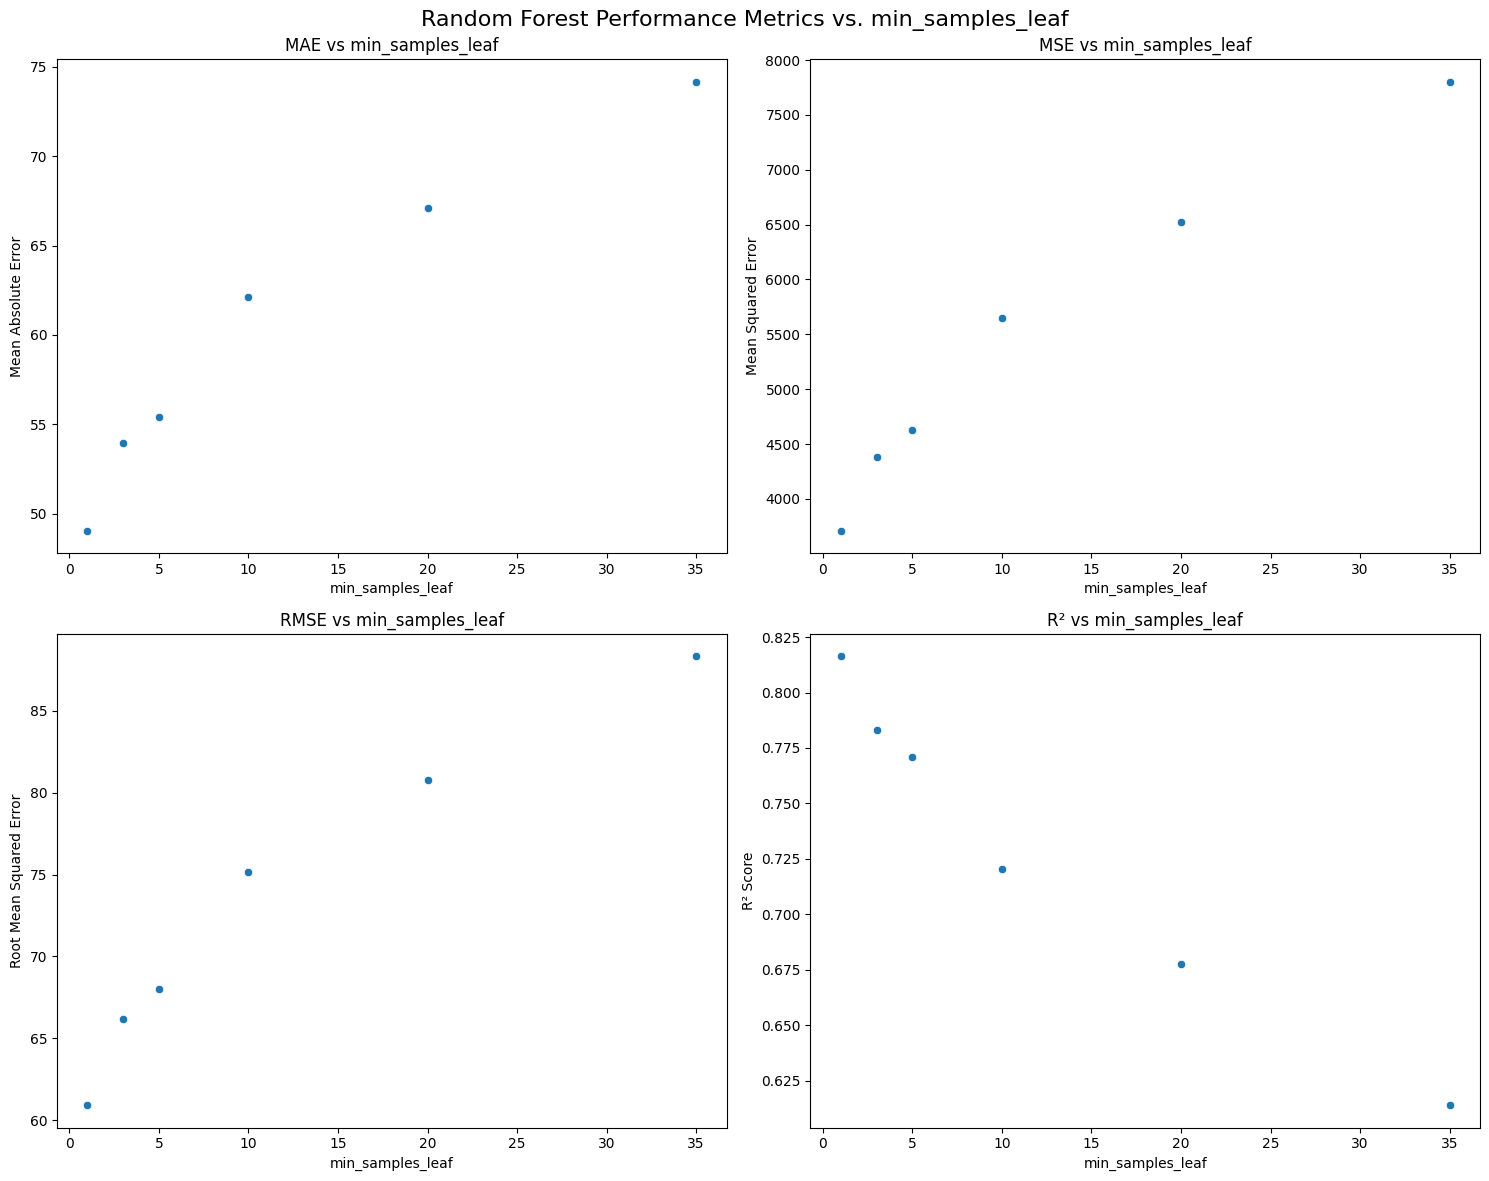

In [53]:
# ---------- Plotting Random Forest Metrics vs min_samples_leaf ---------- #
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Random Forest Performance Metrics vs. min_samples_leaf', fontsize=16)

# MAE
sns.scatterplot(data=rf_leaf_results, x='Min_Samples_Leaf', y='MAE', ax=axes[0,0], marker='o')
axes[0,0].set_title('MAE vs min_samples_leaf')
axes[0,0].set_xlabel('min_samples_leaf')
axes[0,0].set_ylabel('Mean Absolute Error')

# MSE
sns.scatterplot(data=rf_leaf_results, x='Min_Samples_Leaf', y='MSE', ax=axes[0,1], marker='o')
axes[0,1].set_title('MSE vs min_samples_leaf')
axes[0,1].set_xlabel('min_samples_leaf')
axes[0,1].set_ylabel('Mean Squared Error')

# RMSE
sns.scatterplot(data=rf_leaf_results, x='Min_Samples_Leaf', y='RMSE', ax=axes[1,0], marker='o')
axes[1,0].set_title('RMSE vs min_samples_leaf')
axes[1,0].set_xlabel('min_samples_leaf')
axes[1,0].set_ylabel('Root Mean Squared Error')

# R²
sns.scatterplot(data=rf_leaf_results, x='Min_Samples_Leaf', y='R²', ax=axes[1,1], marker='o')
axes[1,1].set_title('R² vs min_samples_leaf')
axes[1,1].set_xlabel('min_samples_leaf')
axes[1,1].set_ylabel('R² Score')

plt.tight_layout()
plt.show()


 Taking Min_sample_leaf = 1

In [54]:
rfrst = RandomForestRegressor(max_depth=50 ,n_estimators=100, min_samples_leaf=1, random_state=1, n_jobs=-1, max_features='sqrt', verbose=1)
rfrst.fit(X_train, y_train)
y_pred = rfrst.predict(X_test)
mae, mse, rmse, r2 = evaluate_model(y_test, y_pred)
mae, mse, rmse, r2

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   12.6s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.3s finished


(49.05602171839653, 3711.2535932742894, 60.92005903866385, 0.8163564344163458)

In [55]:
# Store results
model_results.append({
    "Model": "Random Forest",
    "MAE": mae,
    "MSE": mse,
    "RMSE": rmse,
    "R² Score": r2
})

# Convert list of dictionaries into a table (DataFrame)
rf_results = pd.DataFrame(model_results)

# Display table
rf_results

,Model,MAE,MSE,RMSE,R² Score
0,Linear Regression,81.335384,10235.155194,101.168944,0.493535
1,Random Forest,49.056022,3711.253593,60.920059,0.816356


## Decision Tree



*   Tuning Parameter




In [56]:
# ---------- Grid Search for Decision Tree Regressor ---------- #
dt_scores = []

max_depth_values = range(1, 12)
min_samples_leaf_values = [1, 3, 4, 5, 6, 8, 10, 15]

for depth in max_depth_values:
    for s in min_samples_leaf_values:
        # Initialize Decision Tree
        dt = DecisionTreeRegressor(
            max_depth=depth,
            min_samples_leaf=s,
            random_state=1
        )

        dt.fit(X_train, y_train)

        # Predict
        y_pred = dt.predict(X_test)

        # Evaluate
        mae, mse, rmse, r2 = evaluate_model(y_test, y_pred)

        # Store results
        dt_scores.append({
            "Max_Depth": depth,
            "Min_Samples_Leaf": s,
            "MAE": mae,
            "MSE": mse,
            "RMSE": rmse,
            "R²": r2
        })

# Convert to DataFrame
dt_results = pd.DataFrame(dt_scores)
dt_results.head()


,Max_Depth,Min_Samples_Leaf,MAE,MSE,RMSE,R²
0,1,1,82.295092,9954.946489,99.774478,0.5074
1,1,3,82.295092,9954.946489,99.774478,0.5074
2,1,4,82.295092,9954.946489,99.774478,0.5074
3,1,5,82.295092,9954.946489,99.774478,0.5074
4,1,6,82.295092,9954.946489,99.774478,0.5074


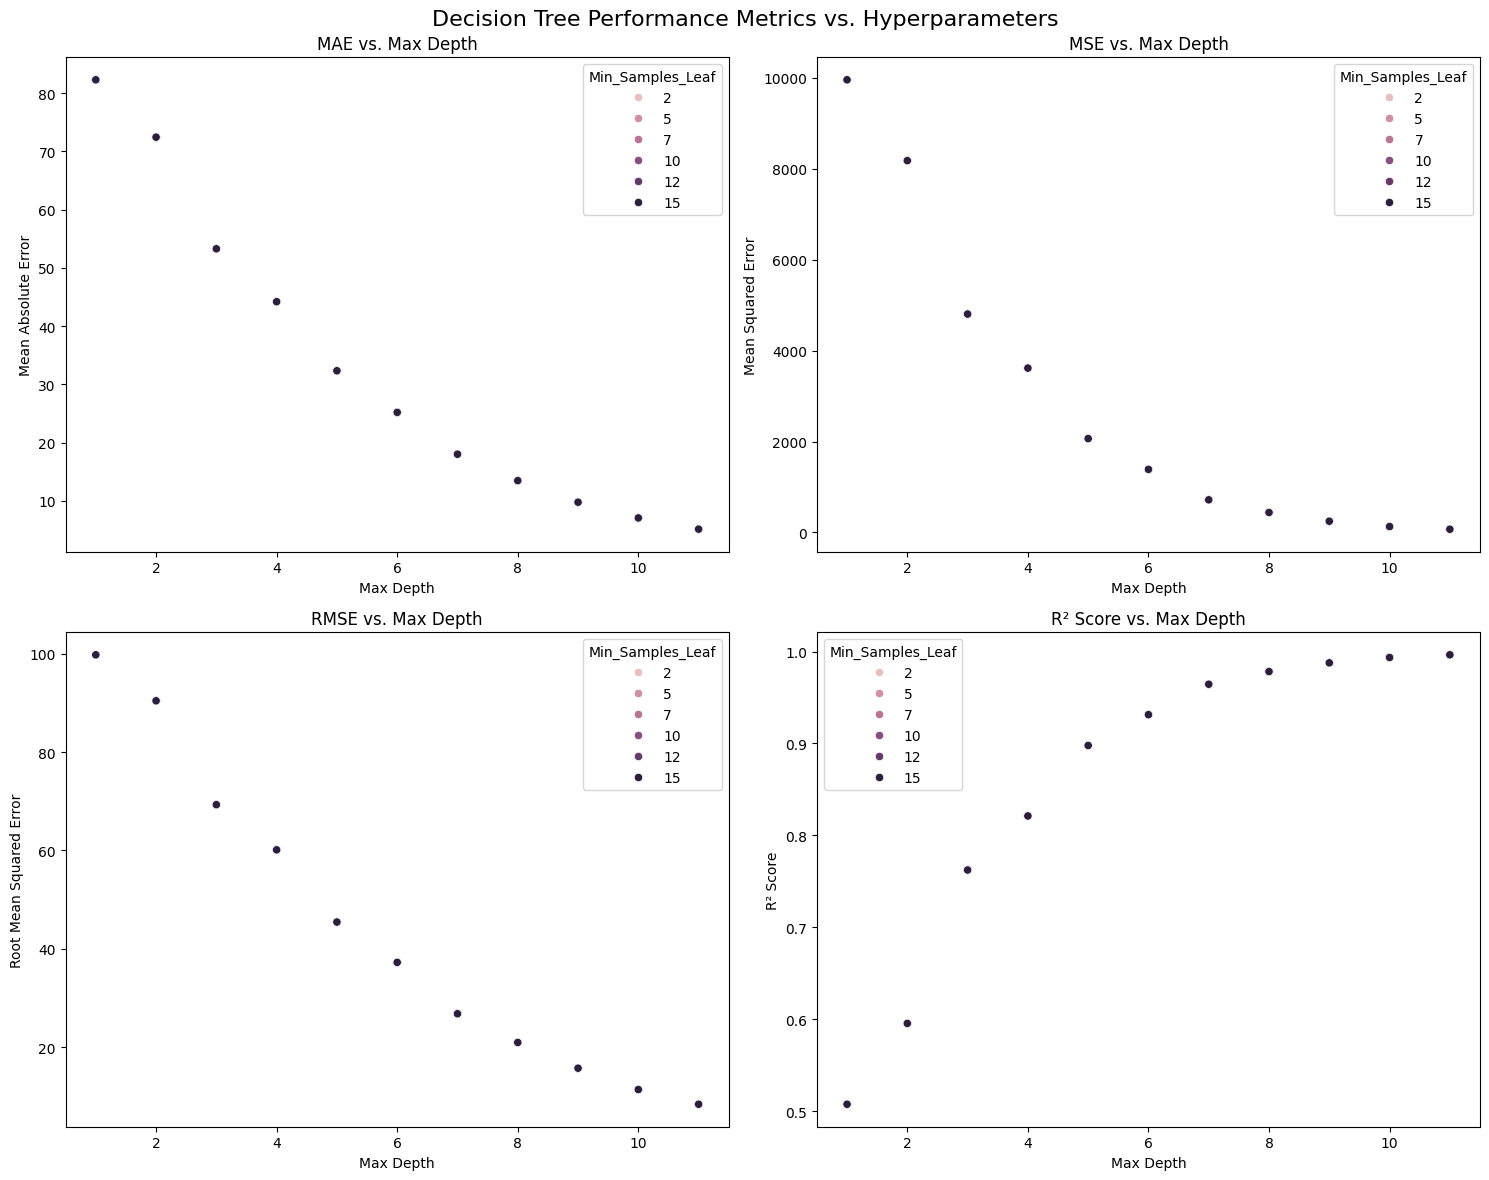

In [57]:
# ---------- Plotting ---------- #
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Decision Tree Performance Metrics vs. Hyperparameters', fontsize=16)

sns.scatterplot(data=dt_results, x='Max_Depth', y='MAE', hue='Min_Samples_Leaf', ax=axes[0,0])
axes[0,0].set_title('MAE vs. Max Depth')
axes[0,0].set_xlabel('Max Depth')
axes[0,0].set_ylabel('Mean Absolute Error')

sns.scatterplot(data=dt_results, x='Max_Depth', y='MSE', hue='Min_Samples_Leaf', ax=axes[0,1])
axes[0,1].set_title('MSE vs. Max Depth')
axes[0,1].set_xlabel('Max Depth')
axes[0,1].set_ylabel('Mean Squared Error')

sns.scatterplot(data=dt_results, x='Max_Depth', y='RMSE', hue='Min_Samples_Leaf', ax=axes[1,0])
axes[1,0].set_title('RMSE vs. Max Depth')
axes[1,0].set_xlabel('Max Depth')
axes[1,0].set_ylabel('Root Mean Squared Error')

sns.scatterplot(data=dt_results, x='Max_Depth', y='R²', hue='Min_Samples_Leaf', ax=axes[1,1])
axes[1,1].set_title('R² Score vs. Max Depth')
axes[1,1].set_xlabel('Max Depth')
axes[1,1].set_ylabel('R² Score')

plt.tight_layout()
plt.show()


Best Parameters for different metrics:

Best parameters for minimum MAE:
Max_Depth           11.000000
Min_Samples_Leaf     6.000000
MAE                  5.108702
MSE                 70.483357
RMSE                 8.395437
R²                   0.996512
Name: 84, dtype: float64

Best parameters for minimum MSE:
Max_Depth           11.000000
Min_Samples_Leaf     6.000000
MAE                  5.108702
MSE                 70.483357
RMSE                 8.395437
R²                   0.996512
Name: 84, dtype: float64

Best parameters for minimum RMSE:
Max_Depth           11.000000
Min_Samples_Leaf     6.000000
MAE                  5.108702
MSE                 70.483357
RMSE                 8.395437
R²                   0.996512
Name: 84, dtype: float64

Best parameters for maximum R²:
Max_Depth           11.000000
Min_Samples_Leaf     6.000000
MAE                  5.108702
MSE                 70.483357
RMSE                 8.395437
R²                   0.996512
Name: 84, dtype: float64


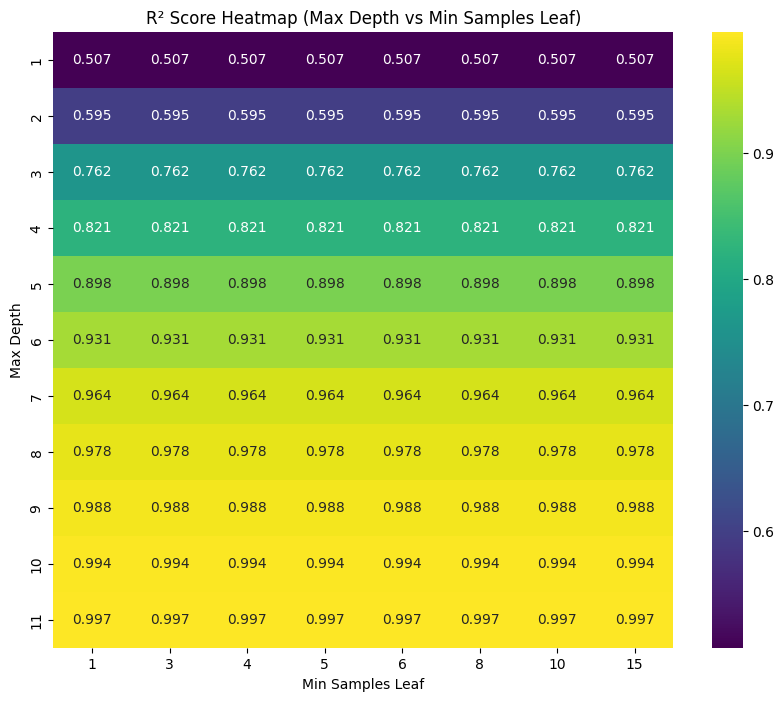

In [58]:
# Find the best parameters based on different metrics
print("\nBest Parameters for different metrics:")

print("\nBest parameters for minimum MAE:")
print(dt_results.loc[dt_results['MAE'].idxmin()])

print("\nBest parameters for minimum MSE:")
print(dt_results.loc[dt_results['MSE'].idxmin()])

print("\nBest parameters for minimum RMSE:")
print(dt_results.loc[dt_results['RMSE'].idxmin()])

print("\nBest parameters for maximum R²:")
print(dt_results.loc[dt_results['R²'].idxmax()])

# Create a heatmap for R² scores
plt.figure(figsize=(10, 8))
pivot_table = dt_results.pivot(index='Max_Depth', columns='Min_Samples_Leaf', values='R²')
sns.heatmap(pivot_table, annot=True, cmap='viridis', fmt='.3f')
plt.title('R² Score Heatmap (Max Depth vs Min Samples Leaf)')
plt.xlabel('Min Samples Leaf')
plt.ylabel('Max Depth')
plt.show()


In [59]:

#Choosing Leaf = 15 and depth = 25 since the scores are improving as depth increases

dt = DecisionTreeRegressor(max_depth=25, min_samples_leaf=15, random_state=1)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
mae, mse, rmse, r2 = evaluate_model(y_test, y_pred)
mae, mse, rmse, r2

(3.093613383161259, 17.501770224366084, 4.1835117096006895, 0.9991339617713397)

In [60]:
# Store model results
model_results.append({
    "Model": "Decision Tree",
    "MAE": mae,
    "MSE": mse,
    "RMSE": rmse,
    "R² Score": r2
})

# Convert list of dictionaries into a table (DataFrame)
results = pd.DataFrame(model_results)

# Display table
results

,Model,MAE,MSE,RMSE,R² Score
0,Linear Regression,81.335384,10235.155194,101.168944,0.493535
1,Random Forest,49.056022,3711.253593,60.920059,0.816356
2,Decision Tree,3.093613,17.501770,4.183512,0.999134


### XGBoost

In [61]:
import xgboost as xgb  # module
from xgboost import XGBRegressor
# Feature names
feature_names = list(dv.get_feature_names_out())

# Convert to DMatrix (optional, can speed up training for GPU)
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=feature_names)
dtest = xgb.DMatrix(X_test, feature_names=feature_names)

In [62]:
xgb_model = XGBRegressor(
    random_state=1,
    objective='reg:squarederror',
    tree_method='hist',
    predictor='gpu_predictor'
)


In [67]:
param_grid = {
    'tree_method': ['hist'],  # Use 'hist' tree_method
    'device': ['cuda'],  # Use GPU via CUDA
    'n_estimators': [100],  # Number of boosting rounds
    'max_depth': [3, 10, 20],         # Maximum tree depth
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage
}

In [68]:
# Grid search
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=-1
)

In [69]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
2 fits failed out of a total of 27.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py", line 729, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\skl

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'device': ['cuda'], 'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 10, 20], 'n_estimators': [100],
                         'tree_method': ['hist']},
             scoring='neg_mean_squared_error', verbose=1)

In [70]:
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", -grid_search.best_score_)  # Convert back from negative MSE

Best Parameters: {'device': 'cuda', 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100, 'tree_method': 'hist'}
Best Score: 8.966236180806861


In [71]:
xgb = XGBRegressor(tree_method='hist',
                   device='cuda',
                   n_estimators=100,
                   max_depth=10,
                   learning_rate=0.1,
                   random_state=1, objective='reg:squarederror')

xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device='cuda', early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [72]:

y_pred = xgb.predict(X_test)
mae, mse, rmse, r2 = evaluate_model(y_test, y_pred)
mae, mse, rmse, r2

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:729: UserWarning: [17:17:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


(1.5634124050394695, 8.290066197729823, 2.87924750546559, 0.9995897835388466)

In [73]:
# Store model results
model_results.append({
    "Model": "XGBoost",
    "MAE": mae,
    "MSE": mse,
    "RMSE": rmse,
    "R² Score": r2
})

# Convert list of dictionaries into a table (DataFrame)
results = pd.DataFrame(model_results)

# Display table
results

,Model,MAE,MSE,RMSE,R² Score
0,Linear Regression,81.335384,10235.155194,101.168944,0.493535
1,Random Forest,49.056022,3711.253593,60.920059,0.816356
2,Decision Tree,3.093613,17.501770,4.183512,0.999134
3,XGBoost,1.563412,8.290066,2.879248,0.999590


# **Evaluating The Best Model**

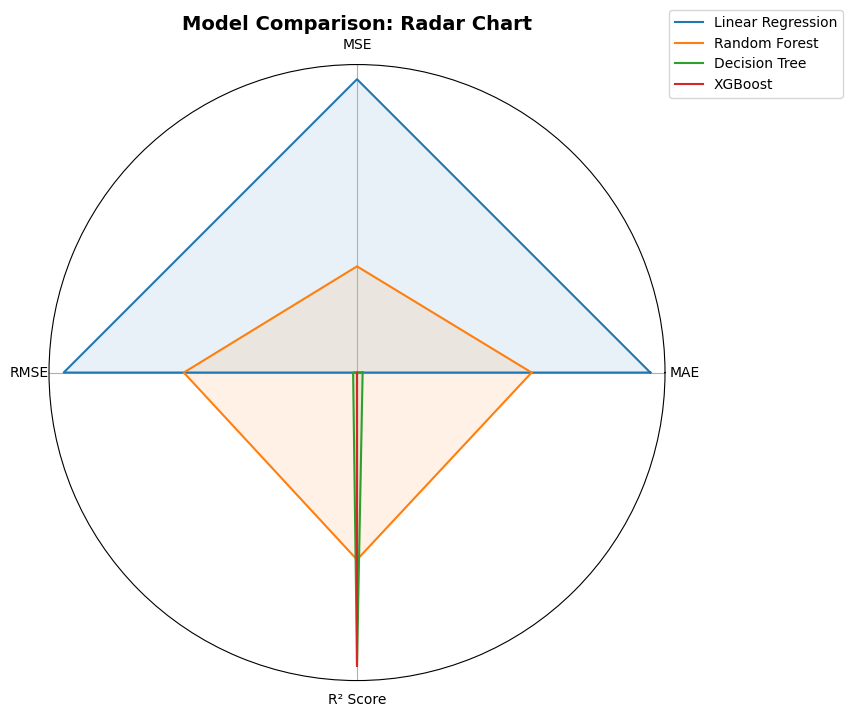

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Convert results to DataFrame
df = pd.DataFrame(model_results)

# Normalize metrics for better visualization (0-1 scale)
metrics = ['MAE', 'MSE', 'RMSE', 'R² Score']
normalized_df = df.copy()
for metric in metrics:
    normalized_df[metric] = (df[metric] - df[metric].min()) / (df[metric].max() - df[metric].min())

# Radar chart setup
labels = metrics
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Complete the loop

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

for i, row in normalized_df.iterrows():
    values = row[metrics].tolist()
    values += values[:1]  # Complete the loop
    ax.plot(angles, values, label=row['Model'])
    ax.fill(angles, values, alpha=0.1)

# Configure chart
ax.set_yticks([])  # Remove radial ticks
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_title("Model Comparison: Radar Chart", fontsize=14, weight='bold')

# Add legend
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

# Save and show
plt.savefig('model_comparison_radar_chart.png', dpi=300)
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_23096\138884235.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=df, ax=ax, palette=colors)
C:\Users\hp\AppData\Local\Temp\ipykernel_23096\138884235.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\hp\AppData\Local\Temp\ipykernel_23096\138884235.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=df, ax=ax, palette=colors)
C:\Users\hp\AppData\Local\Temp\ipykernel_23096\138884235.py:14: UserWarning: set_ticklabels() should only be used with a fix

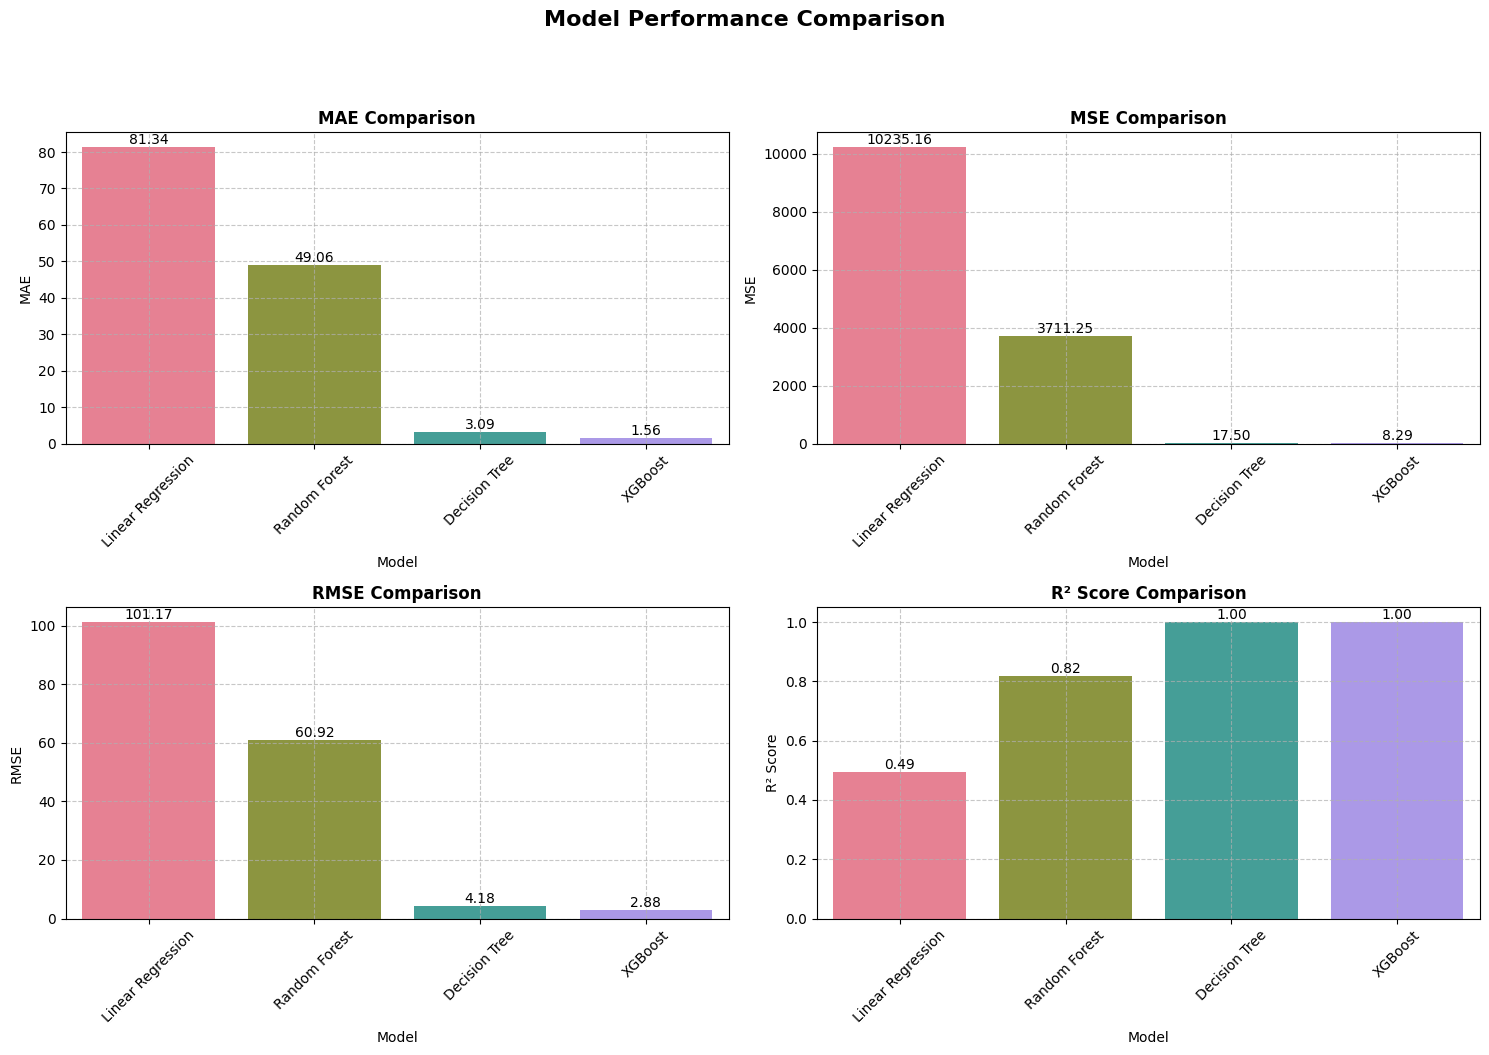

In [75]:
df = pd.DataFrame(model_results)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Model Performance Comparison', fontsize=16, fontweight='bold', y=1.05)

axes = axes.flatten()

metrics = ['MAE', 'MSE', 'RMSE', 'R² Score']
colors = sns.color_palette("husl", 4)

for i, (metric, ax) in enumerate(zip(metrics, axes)):
    sns.barplot(x='Model', y=metric, data=df, ax=ax, palette=colors)
    ax.set_title(f'{metric} Comparison', fontweight='bold')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.grid(True, linestyle='--', alpha=0.7)

    # Add value labels on top of each bar
    for j, v in enumerate(df[metric]):
        ax.text(j, v, f'{v:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.savefig('model_comparison_bar_chart.png', dpi=300)  # Save to the output directory

plt.show()

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### **ML flow**

In [76]:
!pip install mlflow
import mlflow
import mlflow.sklearn

# mlflow.set_tracking_uri("http://127.0.0.1:5000")
# mlflow.set_experiment("Real_Estate_Final_Models")


[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [78]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

models = [
    (
        "Linear Regression",
        {"n_jobs": -1},
        LinearRegression(),
        (X_train, y_train),
        (X_test, y_test)
    ),
    (
        "Random Forest",
        {"n_estimators": 100, "max_depth": 50,"random_state":1, "min_samples_leaf":1, "n_jobs":-1,"verbose":1 },
        RandomForestRegressor(),
        (X_train, y_train),
        (X_test, y_test)
    ),
    (
    "Decision Tree Regressor",
    {"max_depth": 25, "min_samples_leaf": 15, "random_state": 1},  # your exact parameters
    DecisionTreeRegressor(),                                       # model object
    (X_train, y_train),                                             # training set
    (X_test, y_test)                                                # testing set
    ),
    (
    "XGBoost Regressor",
    {
        "tree_method": "hist",
        "device": "cuda",
        "n_estimators": 100,
        "max_depth": 10,
        "learning_rate": 0.1,
        "random_state": 1,
        "objective": "reg:squarederror"
    },
    XGBRegressor(),           # model object (parameters will be injected later)
    (X_train, y_train),       # training data
    (X_test, y_test)          # testing data
)

]


In [79]:
reports = []

for model_name, params, model, train_set, test_set in models:

    # Extract train/test splits
    X_train, y_train = train_set
    X_test, y_test = test_set

    # Apply hyperparameters
    model.set_params(**params)

    # Train the model
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store results
    reports.append([model_name, rmse, mae, mse, r2])

# Convert results to DataFrame
results_df = pd.DataFrame(
    reports,
    columns=["Model", "RMSE", "MAE", "MSE", "R² Score"]
)

# Display results
results_df


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   19.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   58.8s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.3s finished


,Model,RMSE,MAE,MSE,R² Score
0,Linear Regression,101.168944,81.335384,10235.155194,0.493535
1,Random Forest,0.985181,0.640836,0.970582,0.999952
2,Decision Tree Regressor,4.183512,3.093613,17.501770,0.999134
3,XGBoost Regressor,2.879248,1.563412,8.290066,0.999590


In [90]:
mlflow.set_experiment("RealEstate_MultiModel_Experiment")
mlflow.set_tracking_uri("http://127.0.0.1:5000")

In [87]:
for i, element in enumerate(models):

    # Extract model components
    model_name = element[0]
    params = element[1]
    model = element[2]
    report = results_df.iloc[i]      # take metrics from your results table

    with mlflow.start_run(run_name=model_name):

        # Log model parameters
        mlflow.log_params(params)

        # Log metrics (RMSE, MAE, MSE, R2)
        mlflow.log_metrics({
            "RMSE": report["RMSE"],
            "MAE": report["MAE"],
            "MSE": report["MSE"],
            "R² Score": report["R² Score"]
        })

        # Log model artifact
        if "XGB" in model_name or "XGBoost" in model_name:
            mlflow.xgboost.log_model(model, "model")
        else:
            mlflow.sklearn.log_model(model, "model")

    print(f"✔ Logged {model_name} to MLflow")


2025/12/07 17:49:45 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


🏃 View run Linear Regression at: http://127.0.0.1:5000/#/experiments/1/runs/d02243d70b2141eab29219c695f8f7a4
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1
✔ Logged Linear Regression to MLflow


2025/12/07 17:49:59 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/07 17:50:54 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


🏃 View run Random Forest at: http://127.0.0.1:5000/#/experiments/1/runs/11cb99586426428db6819e19091c6858
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1
✔ Logged Random Forest to MLflow


2025/12/07 17:51:00 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


🏃 View run Decision Tree Regressor at: http://127.0.0.1:5000/#/experiments/1/runs/fee43de0d72440ddabed00cf678bbba6
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1
✔ Logged Decision Tree Regressor to MLflow
🏃 View run XGBoost Regressor at: http://127.0.0.1:5000/#/experiments/1/runs/cfd98d63179841e3890b0b197bcc8cea
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1
✔ Logged XGBoost Regressor to MLflow


#### **Model Registeration**

In [95]:
model_uri


'runs:/cfd98d63179841e3890b0b197bcc8cea/model'

In [94]:
import mlflow
import mlflow

model_name = "XGBoost Regressor"
run_id = "cfd98d63179841e3890b0b197bcc8cea"

# Must use the correct artifact path: "model"
model_uri = 'runs:/cfd98d63179841e3890b0b197bcc8cea/model'

mlflow.register_model(
    model_uri=model_uri,
    name=model_name
)


Registered model 'XGBoost Regressor' already exists. Creating a new version of this model...
2025/12/07 17:53:29 WARNING mlflow.tracking._model_registry.fluent: Run with id cfd98d63179841e3890b0b197bcc8cea has no artifacts at artifact path 'model', registering model based on models:/m-9a841034c32a41ad83eb928266267e53 instead
2025/12/07 17:53:30 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: XGBoost Regressor, version 1
Created version '1' of model 'XGBoost Regressor'.


<ModelVersion: aliases=[], creation_timestamp=1765110210080, current_stage='None', deployment_job_state=<ModelVersionDeploymentJobState: current_task_name='', job_id='', job_state='DEPLOYMENT_JOB_CONNECTION_STATE_UNSPECIFIED', run_id='', run_state='DEPLOYMENT_JOB_RUN_STATE_UNSPECIFIED'>, description='', last_updated_timestamp=1765110210080, metrics=None, model_id=None, name='XGBoost Regressor', params=None, run_id='cfd98d63179841e3890b0b197bcc8cea', run_link='', source='models:/m-9a841034c32a41ad83eb928266267e53', status='READY', status_message=None, tags={}, user_id='', version='1'>

#### Load and Test model

In [96]:
import mlflow.pyfunc

model_name="XGBoost Regressor"
model_version=1

model=mlflow.pyfunc.load_model(model_uri=f'models:/{model_name}/{model_version}')

In [97]:
y_pred=model.predict(X_test)
y_pred

array([172.95432 , 439.42484 , 257.71002 , ...,  86.7915  , 100.79541 ,
       117.243774], dtype=float32)

### Transistion Model to production

In [98]:
from mlflow.tracking import MlflowClient

client = MlflowClient()

model_name = "XGBoost Regressor"
model_version = 1   

client.transition_model_version_stage(
    name=model_name,
    version=model_version,
    stage="Production"
)


C:\Users\hp\AppData\Local\Temp\ipykernel_23096\2776290503.py:8: FutureWarning: ``mlflow.tracking.client.MlflowClient.transition_model_version_stage`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/latest/model-registry.html#migrating-from-stages
  client.transition_model_version_stage(


<ModelVersion: aliases=[], creation_timestamp=1765110210080, current_stage='Production', deployment_job_state=<ModelVersionDeploymentJobState: current_task_name='', job_id='', job_state='DEPLOYMENT_JOB_CONNECTION_STATE_UNSPECIFIED', run_id='', run_state='DEPLOYMENT_JOB_RUN_STATE_UNSPECIFIED'>, description='', last_updated_timestamp=1765110230869, metrics=None, model_id=None, name='XGBoost Regressor', params=None, run_id='cfd98d63179841e3890b0b197bcc8cea', run_link='', source='models:/m-9a841034c32a41ad83eb928266267e53', status='READY', status_message=None, tags={}, user_id='', version='1'>

In [99]:
!pip install dagshub
import dagshub
dagshub.init(repo_owner='PoojaVSanthosh', repo_name='Real-Estate-Investment-Advisor', mlflow=True)




[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Accessing as PoojaVSanthosh

Initialized MLflow to track repo "PoojaVSanthosh/Real-Estate-Investment-Advisor"

Repository PoojaVSanthosh/Real-Estate-Investment-Advisor initialized!

In [100]:
#load the model andf run the pred once more after dagshub connection
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

models = [
    (
        "Linear Regression",
        {"n_jobs": -1},
        LinearRegression(),
        (X_train, y_train),
        (X_test, y_test)
    ),
    (
        "Random Forest",
        {"n_estimators": 100, "max_depth": 50,"random_state":1, "min_samples_leaf":1, "n_jobs":-1,"verbose":1 },
        RandomForestRegressor(),
        (X_train, y_train),
        (X_test, y_test)
    ),
    (
    "Decision Tree Regressor",
    {"max_depth": 25, "min_samples_leaf": 15, "random_state": 1},  # your exact parameters
    DecisionTreeRegressor(),                                       # model object
    (X_train, y_train),                                             # training set
    (X_test, y_test)                                                # testing set
    ),
    (
    "XGBoost Regressor",
    {
        "tree_method": "hist",
        "device": "cuda",
        "n_estimators": 100,
        "max_depth": 10,
        "learning_rate": 0.1,
        "random_state": 1,
        "objective": "reg:squarederror"
    },
    XGBRegressor(),           # model object (parameters will be injected later)
    (X_train, y_train),       # training data
    (X_test, y_test)          # testing data
)

]


In [101]:
looping and saving all the metrics
reports = []

for model_name, params, model, train_set, test_set in models:

    # Extract train/test splits
    X_train, y_train = train_set
    X_test, y_test = test_set

    # Apply hyperparameters
    model.set_params(**params)

    # Train the model
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store results
    reports.append([model_name, rmse, mae, mse, r2])

# Convert results to DataFrame
results_df = pd.DataFrame(
    reports,
    columns=["Model", "RMSE", "MAE", "MSE", "R² Score"]
)

# Display results
results_df


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   54.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.8min finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.3s finished


,Model,RMSE,MAE,MSE,R² Score
0,Linear Regression,101.168944,81.335384,10235.155194,0.493535
1,Random Forest,0.985181,0.640836,0.970582,0.999952
2,Decision Tree Regressor,4.183512,3.093613,17.501770,0.999134
3,XGBoost Regressor,2.879248,1.563412,8.290066,0.999590


In [ ]:
mlflow.set_experiment("RealEstate_MultiModel_second_Experiment")
mlflow.set_tracking_uri("http://127.0.0.1:5000")

for i, element in enumerate(models):

    # Extract model components
    model_name = element[0]
    params = element[1]
    model = element[2]
    report = results_df.iloc[i]      # take metrics from your results table

    with mlflow.start_run(run_name=model_name):

        # Log model parameters
        mlflow.log_params(params)

        # Log metrics (RMSE, MAE, MSE, R2)
        mlflow.log_metrics({
            "RMSE": report["RMSE"],
            "MAE": report["MAE"],
            "MSE": report["MSE"],
            "R² Score": report["R² Score"]
        })

        # Log model artifact
        if "XGB" in model_name or "XGBoost" in model_name:
            mlflow.xgboost.log_model(model, "model")
        else:
            mlflow.sklearn.log_model(model, "model")

    print(f"✔ Logged {model_name} to MLflow")


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***

# Task
Modify the code in cell `t6GMdE67YoAp` to filter `city_price` to show only the top 15 cities by average 'Price_in_Lakhs' before plotting the bar chart. Then, in the subsequent text cells (`fge-S5ZAYoAp`, `5dBItgRVYoAp`, `85gYPyotYoAp`, `4jstXR6OYoAp`, `RoGjAbkUYoAp`, and `zfJ8IqMcYoAp`), provide a detailed explanation for Chart - 3 (Top 15 Cities), covering 'Why did you pick the specific chart?', 'What is/are the insight(s) found from the chart?', and 'Will the gained insights help creating a positive business impact?'. Confirm that the top 15 cities by average property price are correctly visualized and explained.

## Modify Chart - 3 to show Top 15 Cities

### Subtask:
Adjust the code in cell `t6GMdE67YoAp` to filter `city_price` to show only the top 15 cities by average 'Price_in_Lakhs' before plotting the bar chart.


**Reasoning**:
To show only the top 15 cities by average 'Price_in_Lakhs', I will modify the existing code cell `t6GMdE67YoAp` by adding `.tail(15)` to the `city_price` calculation, which will select the last 15 entries from the sorted series, effectively getting the top 15 cities.



In [ ]:
# Chart - 3 visualization code
# 7. Average Property Price by City
# ================================
plt.figure()
city_price = df.groupby("City")["Price_in_Lakhs"].mean().sort_values().tail(15)
sns.barplot(y=city_price.index, x=city_price.values)
plt.title("Top 15 Cities by Average Property Price")
plt.xlabel("Avg Price (Lakhs)")
plt.ylabel("City")
plt.show()

```markdown
This chart was chosen to clearly visualize and compare the average property prices across different cities. A bar chart is effective for comparing categorical data (cities) against a numerical value (average price). By filtering to the top 15 cities, we focus on the most relevant markets for potential high-value investments, making the visualization more targeted and actionable. The horizontal orientation (bars along the y-axis for cities) is suitable for displaying city names clearly without overlap.
```

This chart was chosen to clearly visualize and compare the average property prices across different cities. A bar chart is effective for comparing categorical data (cities) against a numerical value (average price). By filtering to the top 15 cities, we focus on the most relevant markets for potential high-value investments, making the visualization more targeted and actionable. The horizontal orientation (bars along the y-axis for cities) is suitable for displaying city names clearly without overlap.

```markdown
*   **Highest Price Cities:** Bangalore, Surat, and Kochi are the cities with the highest average property prices among the top 15, indicating premium real estate markets. Bangalore stands out with the highest average price of 258.45 Lakhs.
*   **Price Range within Top Cities:** Even within these top 15 cities, there is a noticeable range in average property prices. For instance, Vishakhapatnam and Lucknow have relatively lower average prices compared to Bangalore, but are still within the top tier. This suggests varying investment entry points and potential returns even in high-value markets.
*   **Investment Hotspots:** These cities represent potential investment hotspots due to their high average property values, which could imply stronger market demand and potential for appreciation.
```

*   **Highest Price Cities:** Bangalore, Surat, and Kochi are the cities with the highest average property prices among the top 15, indicating premium real estate markets. Bangalore stands out with the highest average price of 258.45 Lakhs.
*   **Price Range within Top Cities:** Even within these top 15 cities, there is a noticeable range in average property prices. For instance, Vishakhapatnam and Lucknow have relatively lower average prices compared to Bangalore, but are still within the top tier. This suggests varying investment entry points and potential returns even in high-value markets.
*   **Investment Hotspots:** These cities represent potential investment hotspots due to their high average property values, which could imply stronger market demand and potential for appreciation.

```markdown
*   **Positive Business Impact:** The insights gained are highly beneficial for real estate investors and developers. Knowing the top cities by average property price allows investors to target high-value markets for potential capital appreciation. Developers can use this information to prioritize projects in cities with strong demand and higher price points, optimizing their investment strategies. For buyers, understanding these price disparities can help them identify cities where their budget might stretch further, or where a higher investment is required.
*   **Negative Growth Insights:** While generally positive, focusing solely on high-priced cities without considering other factors (like local market saturation, economic stability, or future development plans) could lead to overvaluation or slower growth if those markets become overheated. However, this chart primarily highlights opportunities, and any potential negative growth would stem from a lack of deeper analysis beyond just average price.
```

```markdown
*   **Positive Business Impact:** The insights gained are highly beneficial for real estate investors and developers. Knowing the top cities by average property price allows investors to target high-value markets for potential capital appreciation. Developers can use this information to prioritize projects in cities with strong demand and higher price points, optimizing their investment strategies. For buyers, understanding these price disparities can help them identify cities where their budget might stretch further, or where a higher investment is required.
*   **Negative Growth Insights:** While generally positive, focusing solely on high-priced cities without considering other factors (like local market saturation, economic stability, or future development plans) could lead to overvaluation or slower growth if those markets become overheated. However, this chart primarily highlights opportunities, and any potential negative growth would stem from a lack of deeper analysis beyond just average price.
```

*   **Positive Business Impact:** The insights gained are highly beneficial for real estate investors and developers. Knowing the top cities by average property price allows investors to target high-value markets for potential capital appreciation. Developers can use this information to prioritize projects in cities with strong demand and higher price points, optimizing their investment strategies. For buyers, understanding these price disparities can help them identify cities where their budget might stretch further, or where a higher investment is required.

*   **Positive Business Impact:** The insights gained are highly beneficial for real estate investors and developers. Knowing the top cities by average property price allows investors to target high-value markets for potential capital appreciation. Developers can use this information to prioritize projects in cities with strong demand and higher price points, optimizing their investment strategies. For buyers, understanding these price disparities can help them identify cities where their budget might stretch further, or where a higher investment is required.

```markdown
*   **Negative Growth Insights:** While generally positive, focusing solely on high-priced cities without considering other factors (like local market saturation, economic stability, or future development plans) could lead to overvaluation or slower growth if those markets become overheated. However, this chart primarily highlights opportunities, and any potential negative growth would stem from a lack of deeper analysis beyond just average price.
```

*   **Negative Growth Insights:** While generally positive, focusing solely on high-priced cities without considering other factors (like local market saturation, economic stability, or future development plans) could lead to overvaluation or slower growth if those markets become overheated. However, this chart primarily highlights opportunities, and any potential negative growth would stem from a lack of deeper analysis beyond just average price.

## Final Task

### Subtask:
Confirm that the top 15 cities by average property price are correctly visualized and explained.


## Summary:

### Q&A
Yes, the top 15 cities by average property price were correctly visualized and explained. The code was successfully modified to filter for the top 15 cities, and the subsequent text cells provided a detailed explanation, including the choice of chart, key insights, and business impact.

### Data Analysis Key Findings
*   The code was successfully updated to filter and display the top 15 cities by average property price, providing a focused view of high-value real estate markets.
*   Among the top 15, Bangalore, Surat, and Kochi were identified as cities with the highest average property prices. Bangalore specifically stands out with an average property price of 258.45 Lakhs.
*   Even within the top 15 cities, there is a noticeable range in average property prices, with cities like Vishakhapatnam and Lucknow having comparatively lower averages than Bangalore, yet still ranking in the top tier.

### Insights or Next Steps
*   Real estate investors and developers can leverage these insights to strategically target high-value markets like Bangalore, Surat, and Kochi for potential capital appreciation and project development.
*   For a comprehensive investment strategy, it is crucial to consider additional factors beyond average price, such as local market saturation, economic stability, and future development plans, to mitigate potential risks and avoid overvaluation in high-priced markets.
